# Part I. Data uploading, pre-processing and features engineering

## 2. Data uploading and features engineering

### 2.1 Data uploading

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

%matplotlib inline

As a source of data we will use well known Bloomberg terminal. We exported Apple's historical price and fundamental data for the period from 2000-01-01 to 2019-06-24 (almost 20 years) through Excel file using Pandas data reader. 

In [2]:
filename = 'apple_data_v2.xlsx'

In [3]:
data = pd.read_excel(filename, sheet_names='APPLE_data', index_col=0)

Below a short characteristics of our data. As we see some metrics (BEST_EPS and EQY_DVD_YLD_IND_NET) not fully covered our data set and include mostly missed values. 
It's reasonable to drop this columns. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7115 entries, 2000-01-01 to 2019-06-24
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PX_LAST                         7115 non-null   float64
 1   BEST_EPS                        973 non-null    float64
 2   BS_LT_BORROW                    7115 non-null   int64  
 3   BS_ST_BORROW                    7115 non-null   int64  
 4   BS_TOT_ASSET                    7115 non-null   int64  
 5   CF_CASH_FROM_OPER               7115 non-null   int64  
 6   EBITDA                          7115 non-null   int64  
 7   EQY_DVD_YLD_IND_NET             2527 non-null   float64
 8   EQY_SH_OUT                      7115 non-null   float64
 9   EPS_Annualized                  7115 non-null   float64
 10  IS_Diluted_EPS                  7115 non-null   float64
 11  Net_income                      7115 non-null   int64  
 12  IS_EPS          

In [5]:
data.head()

PX_LAST  BEST_EPS  BS_LT_BORROW  BS_ST_BORROW  BS_TOT_ASSET  \
Dates                                                                     
2000-01-01   3.6719       NaN           300             0          7586   
2000-01-02   3.6719       NaN           300             0          7586   
2000-01-03   3.9978       NaN           300             0          7586   
2000-01-04   3.6607       NaN           300             0          7586   
2000-01-05   3.7143       NaN           300             0          7586   

            CF_CASH_FROM_OPER  EBITDA  EQY_DVD_YLD_IND_NET  EQY_SH_OUT  \
Dates                                                                    
2000-01-01                373     120                  NaN    4502.372   
2000-01-02                373     120                  NaN    4502.372   
2000-01-03                373     120                  NaN    4502.372   
2000-01-04                373     120                  NaN    4502.372   
2000-01-05                373     120                  NaN    4502.372   

            EPS_Annualized  ...  PX_TO_CASH_FLOW  CUR_MKT_CAP  \
Dates                       ...                                 
2000-01-01          0.1623  ...          16.4307   16532.1468   
2000-01-02          0.1623  ...          16.4307   16532.1468   
2000-01-03          0.1623  ...          17.8890   17999.4376   
2000-01-04          0.1623  ...          16.3808   16481.8971   
2000-01-05          0.1623  ...          16.6205   16723.0956   

            Current_EV_to_t12m_ebitda  PX_VOLUME  \
Dates                                              
2000-01-01                    30.2089   40952800   
2000-01-02                    30.2089   40952800   
2000-01-03                    33.5361  133954800   
2000-01-04                    30.0950  127932000   
2000-01-05                    30.6419  194580400   

            CASH_AND_MARKETABLE_SECURITIES  GROSS_PROFIT  CF_FREE_CASH_FLOW  \
Dates                                                                         
2000-01-01                            3660           607                335   
2000-01-02                            3660           607                335   
2000-01-03                            3660           607                335   
2000-01-04                            3660           607                335   
2000-01-05                            3660           607                335   

            ENTERPRISE_VALUE  TOT_COMMON_EQY  BOOK_VAL_PER_SH  
Dates                                                          
2000-01-01        13365.8836            4264           0.9446  
2000-01-02        13365.8836            4264           0.9446  
2000-01-03        13365.8836            4264           0.9446  
2000-01-04        13365.8836            4264           0.9446  
2000-01-05        13365.8836            4264           0.9446  

[5 rows x 27 columns]

In [6]:
data.describe().round(2)

PX_LAST  BEST_EPS  BS_LT_BORROW  BS_ST_BORROW  BS_TOT_ASSET  \
count  7115.00    973.00       7115.00       7115.00       7115.00   
mean     54.79      2.29      19140.05       3444.04     121712.54   
std      58.82      0.16      33219.54       6640.25     130958.48   
min       0.94      1.97          0.00          0.00       5986.00   
25%       4.57      2.12          0.00          0.00       8050.00   
50%      27.20      2.27          0.00          0.00      48140.00   
75%      95.24      2.43      28987.00       2010.00     225184.00   
max     232.07      2.59     103922.00      22429.00     406794.00   

       CF_CASH_FROM_OPER    EBITDA  EQY_DVD_YLD_IND_NET  EQY_SH_OUT  \
count            7115.00   7115.00              2527.00     7115.00   
mean             7434.82   7827.51                 1.88     5673.80   
std              8487.48   8480.54                 0.37      631.93   
min              -125.00   -396.00                 1.26     4502.37   
25%               283.00    193.00                 1.59     5087.06   
50%              3938.00   3887.00                 1.80     5767.54   
75%             12523.00  15277.00                 2.14     6243.92   
max             33722.00  29019.00                 3.10     6584.84   

       EPS_Annualized  ...  PX_TO_CASH_FLOW  CUR_MKT_CAP  \
count         7115.00  ...          7115.00      7115.00   
mean             3.79  ...            17.94    307489.72   
std              4.34  ...            12.17    305236.49   
min             -0.17  ...             5.49      4651.12   
25%              0.21  ...            10.07     21906.31   
50%              1.61  ...            14.26    169776.02   
75%              6.72  ...            22.01    565684.47   
max             16.88  ...           112.61   1120880.93   

       Current_EV_to_t12m_ebitda     PX_VOLUME  \
count                    7115.00  7.115000e+03   
mean                       14.93  1.154154e+08   
std                        10.19  9.937929e+07   
min                         1.65  1.429691e+06   
25%                         7.57  4.927508e+07   
50%                        10.23  8.828532e+07   
75%                        21.20  1.522924e+08   
max                        46.75  1.856379e+09   

       CASH_AND_MARKETABLE_SECURITIES  GROSS_PROFIT  CF_FREE_CASH_FLOW  \
count                         7115.00       7115.00            7115.00   
mean                         86634.80       9633.94            6245.36   
std                          94156.63       9793.85            7388.59   
min                           3609.00        -21.00            -318.00   
25%                           5464.00        634.00             223.00   
50%                          33992.00       5105.00            3599.00   
75%                         158842.00      17947.00            9857.00   
max                         285097.00      33912.00           30505.00   

       ENTERPRISE_VALUE  TOT_COMMON_EQY  BOOK_VAL_PER_SH  
count           7115.00         7115.00          7115.00  
mean          234193.23        57431.75            10.08  
std           240374.33        53816.62             9.75  
min              923.21         3709.00             0.77  
25%            18934.98         5076.00             0.94  
50%           149629.23        31640.00             5.02  
75%           430142.34       120179.00            20.59  
max           950773.54       140199.00            27.59  

[8 rows x 27 columns]

In [7]:
data.dropna(axis='columns', inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7115 entries, 2000-01-01 to 2019-06-24
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PX_LAST                         7115 non-null   float64
 1   BS_LT_BORROW                    7115 non-null   int64  
 2   BS_ST_BORROW                    7115 non-null   int64  
 3   BS_TOT_ASSET                    7115 non-null   int64  
 4   CF_CASH_FROM_OPER               7115 non-null   int64  
 5   EBITDA                          7115 non-null   int64  
 6   EQY_SH_OUT                      7115 non-null   float64
 7   EPS_Annualized                  7115 non-null   float64
 8   IS_Diluted_EPS                  7115 non-null   float64
 9   Net_income                      7115 non-null   int64  
 10  IS_EPS                          7115 non-null   float64
 11  IS_INC_BEF_XO_ITEM              7115 non-null   int64  
 12  SALES_REV_TURN  

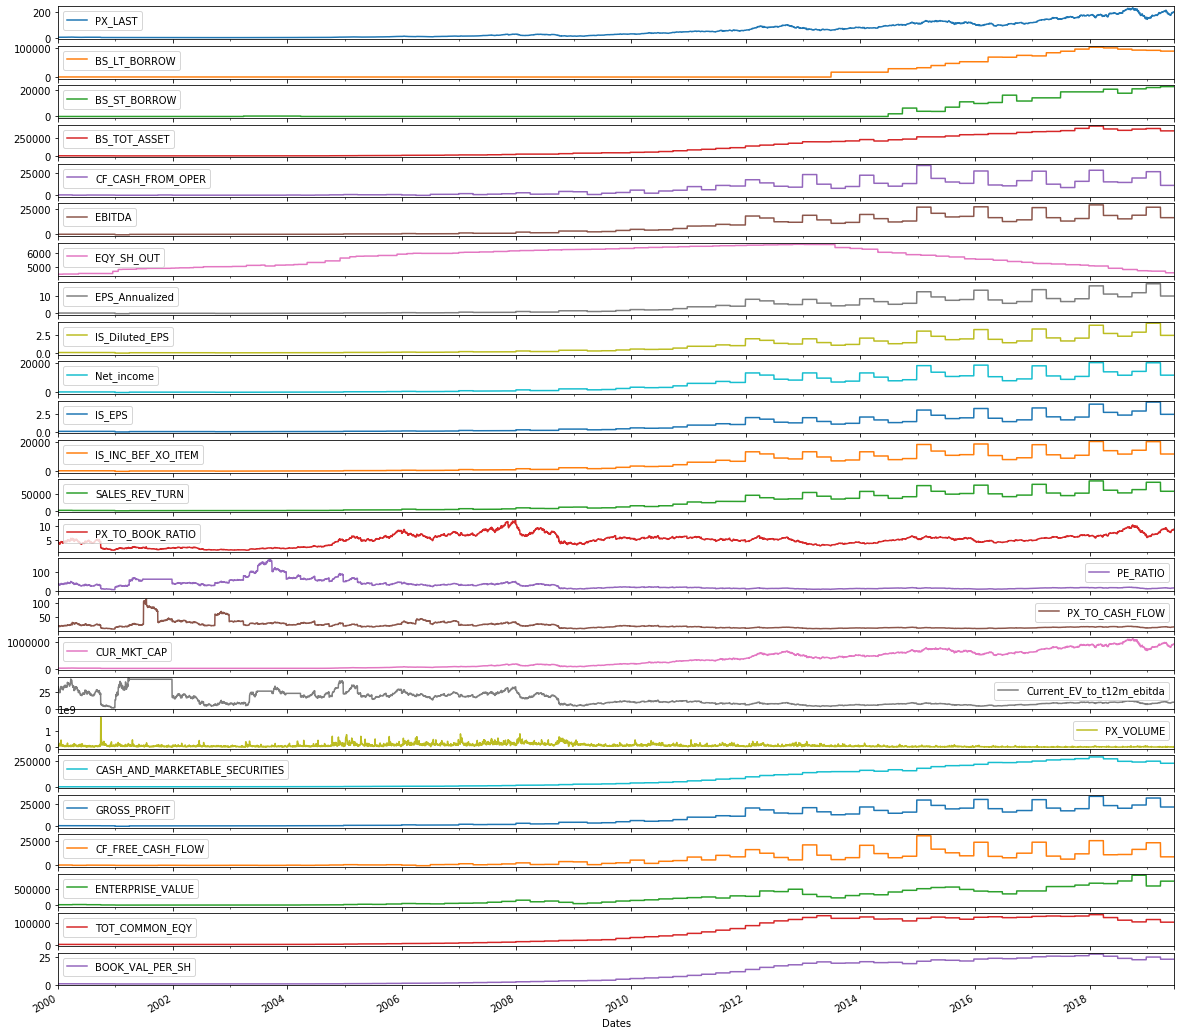

In [9]:
data.plot(figsize=(20, 20), subplots=True);  

### 2.2 Shift fundamental data

After first observation we must noted:
    a) data points based on calendar (not working) days so for our calculations (lagged ratios, etc) we must use number of calendar days
    b) fundamentals data (financial ratios, balance sheet and P&L ratios) in data set observed earlier then it was published (observed) in reality (on markets) and we must shift this data. 

In [10]:
fundamentals=['BS_LT_BORROW', 'BS_ST_BORROW','BS_TOT_ASSET','CF_CASH_FROM_OPER', 'EBITDA','Net_income',
              'SALES_REV_TURN','CASH_AND_MARKETABLE_SECURITIES', 'GROSS_PROFIT','CF_FREE_CASH_FLOW']

In [11]:
data[fundamentals]=data[fundamentals].shift(30)

In [12]:
data

PX_LAST  BS_LT_BORROW  BS_ST_BORROW  BS_TOT_ASSET  \
Dates                                                            
2000-01-01    3.6719           NaN           NaN           NaN   
2000-01-02    3.6719           NaN           NaN           NaN   
2000-01-03    3.9978           NaN           NaN           NaN   
2000-01-04    3.6607           NaN           NaN           NaN   
2000-01-05    3.7143           NaN           NaN           NaN   
...              ...           ...           ...           ...   
2019-06-20  199.4600       90201.0       22429.0      341998.0   
2019-06-21  198.7800       90201.0       22429.0      341998.0   
2019-06-22  198.7800       90201.0       22429.0      341998.0   
2019-06-23  198.7800       90201.0       22429.0      341998.0   
2019-06-24  199.7462       90201.0       22429.0      341998.0   

            CF_CASH_FROM_OPER   EBITDA  EQY_SH_OUT  EPS_Annualized  \
Dates                                                                
2000-01-01                NaN      NaN    4502.372          0.1623   
2000-01-02                NaN      NaN    4502.372          0.1623   
2000-01-03                NaN      NaN    4502.372          0.1623   
2000-01-04                NaN      NaN    4502.372          0.1623   
2000-01-05                NaN      NaN    4502.372          0.1623   
...                       ...      ...         ...             ...   
2019-06-20            11155.0  16455.0    4601.075          9.8800   
2019-06-21            11155.0  16455.0    4601.075          9.8800   
2019-06-22            11155.0  16455.0    4601.075          9.8800   
2019-06-23            11155.0  16455.0    4601.075          9.8800   
2019-06-24            11155.0  16455.0    4601.075          9.8800   

            IS_Diluted_EPS  Net_income  ...  PX_TO_CASH_FLOW  CUR_MKT_CAP  \
Dates                                   ...                                 
2000-01-01          0.0366         NaN  ...          16.4307   16532.1468   
2000-01-02          0.0366         NaN  ...          16.4307   16532.1468   
2000-01-03          0.0366         NaN  ...          17.8890   17999.4376   
2000-01-04          0.0366         NaN  ...          16.3808   16481.8971   
2000-01-05          0.0366         NaN  ...          16.6205   16723.0956   
...                    ...         ...  ...              ...          ...   
2019-06-20          2.4600     11561.0  ...          13.2480  917730.4195   
2019-06-21          2.4600     11561.0  ...          13.2029  914601.6885   
2019-06-22          2.4600     11561.0  ...          13.2029  914601.6885   
2019-06-23          2.4600     11561.0  ...          13.2029  914601.6885   
2019-06-24          2.4600     11561.0  ...          13.2670  919047.2497   

            Current_EV_to_t12m_ebitda  PX_VOLUME  \
Dates                                              
2000-01-01                    30.2089   40952800   
2000-01-02                    30.2089   40952800   
2000-01-03                    33.5361  133954800   
2000-01-04                    30.0950  127932000   
2000-01-05                    30.6419  194580400   
...                               ...        ...   
2019-06-20                    10.4073   21513988   
2019-06-21                    10.3668   47800589   
2019-06-22                    10.3668   47800589   
2019-06-23                    10.3668   47800589   
2019-06-24                    10.4243    1429691   

            CASH_AND_MARKETABLE_SECURITIES  GROSS_PROFIT  CF_FREE_CASH_FLOW  \
Dates                                                                         
2000-01-01                             NaN           NaN                NaN   
2000-01-02                             NaN           NaN                NaN   
2000-01-03                             NaN           NaN                NaN   
2000-01-04                             NaN           NaN                NaN   
2000-01-05                             NaN           NaN                NaN   
...        

### 2.3 Annualized fundamental metrics

After this we must annualized some P&L metrics such as Net income, EBITDA and so on. 

In [13]:
data['Net_income_12m']=data['Net_income'].rolling(window=365).sum()/90

In [14]:
data['CF_CASH_FROM_OPER_12m']=data['CF_CASH_FROM_OPER'].rolling(window=365).sum()/90

In [15]:
data['EBITDA_12m']=data['EBITDA'].rolling(window=365).sum()/90

In [16]:
EBITDA=['EBITDA','EBITDA_12m']

In [17]:
data['SALES_REV_TURN_12m']=data['SALES_REV_TURN'].rolling(window=365).sum()/90

In [18]:
sales=['SALES_REV_TURN','SALES_REV_TURN_12m']

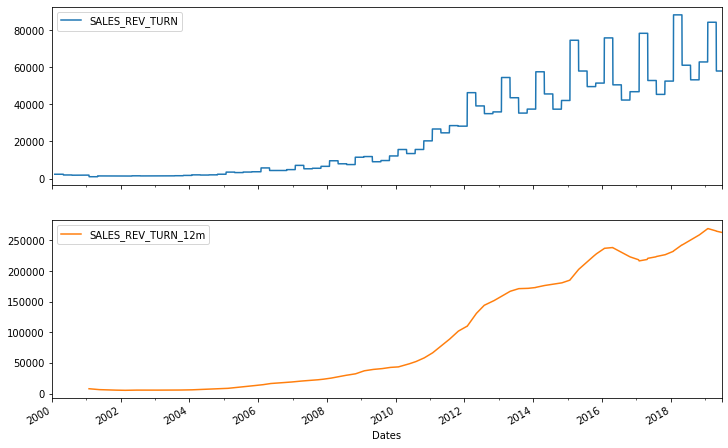

In [19]:
data[sales].plot(figsize=(12, 8), subplots=True); 

In [20]:
data['GROSS_PROFIT_12m']=data['GROSS_PROFIT'].rolling(window=365).sum()/90

In [21]:
data['CF_FREE_CASH_FLOW_12m']=data['CF_FREE_CASH_FLOW'].rolling(window=365).sum()/90

In [22]:
ann_metrics=['Net_income_12m','Net_income','EBITDA','EBITDA_12m','SALES_REV_TURN','SALES_REV_TURN_12m','GROSS_PROFIT_12m','GROSS_PROFIT','CF_FREE_CASH_FLOW_12m','CF_FREE_CASH_FLOW']

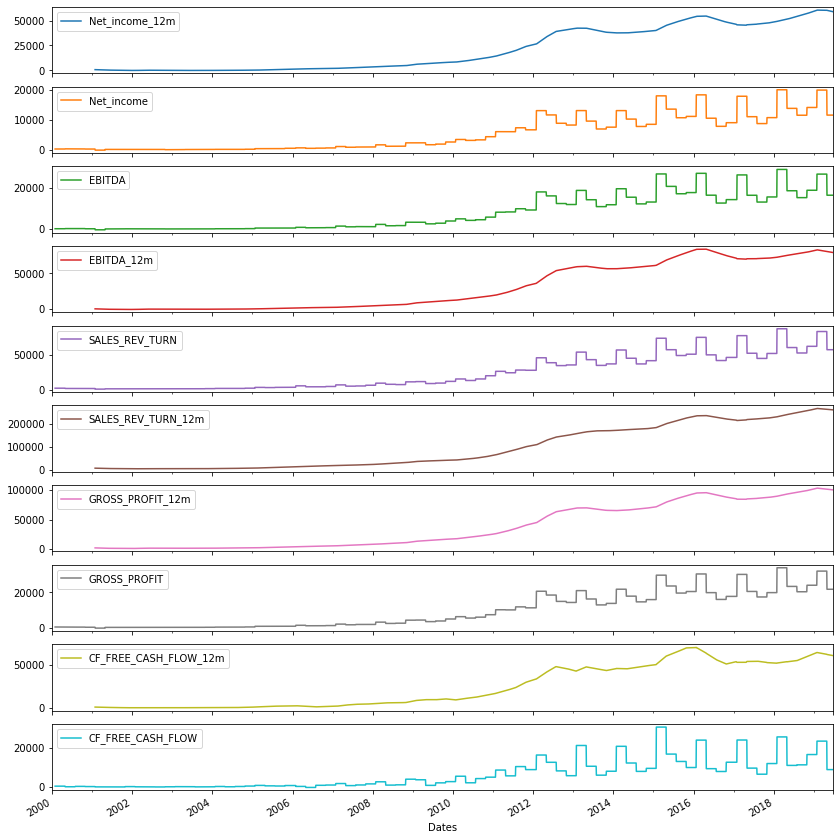

In [23]:
data[ann_metrics].plot(figsize=(14, 16), subplots=True); 

### 2.4 One-day returns calculation and checking 

Next calculate one-day log-returns and check for anomalies, missing values etc.

In [24]:
data['1d_rets']=np.log(data['PX_LAST'] / data['PX_LAST'].shift(1))

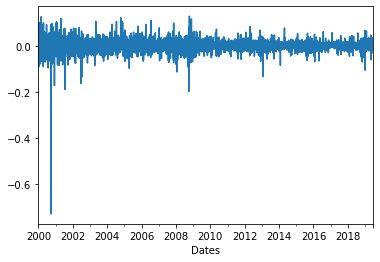

In [25]:
data['1d_rets'].plot()

In [26]:
data['1d_rets'].min()

-0.7312317831686231

In [27]:
data[data['1d_rets']==data['1d_rets'].min()].head(2)

PX_LAST  BS_LT_BORROW  BS_ST_BORROW  BS_TOT_ASSET  \
Dates                                                           
2000-09-29   1.8393         300.0           0.0        6932.0   

            CF_CASH_FROM_OPER  EBITDA  EQY_SH_OUT  EPS_Annualized  \
Dates                                                               
2000-09-29              234.0   193.0    4549.567          0.1771   

            IS_Diluted_EPS  Net_income  ...  ENTERPRISE_VALUE  TOT_COMMON_EQY  \
Dates                                   ...                                     
2000-09-29          0.0393       200.0  ...        13636.7757            4026   

            BOOK_VAL_PER_SH  Net_income_12m  CF_CASH_FROM_OPER_12m  \
Dates                                                                
2000-09-29           0.8853             NaN                    NaN   

            EBITDA_12m  SALES_REV_TURN_12m  GROSS_PROFIT_12m  \
Dates                                                          
2000-09-29         NaN                 NaN               NaN   

            CF_FREE_CASH_FLOW_12m   1d_rets  
Dates                                        
2000-09-29                    NaN -0.731232  

[1 rows x 32 columns]

As we see there was a significant price drop on September 29 2000. 
That time Apple warned that its fourth-quarter profit would fall well short of Wall Street forecasts and after this its shares rapidly fallen (see link below).
This jump will negatively affected all data set and metrics (it will distorted risk, momentum and others factors).
As a result it will distorted ML algorithms as well.
And as this jump mostly event-driven and prediction of this events completely of the scope of this Report I think it is reasonable to cut off this data and start our research from 2001-01-01.

https://money.cnn.com/2000/09/29/markets/techwrap/

In [28]:
data=data.truncate(before='2001-01-01')

In [29]:
data.head()

PX_LAST  BS_LT_BORROW  BS_ST_BORROW  BS_TOT_ASSET  \
Dates                                                           
2001-01-01   1.0625         300.0           0.0        6803.0   
2001-01-02   1.0625         300.0           0.0        6803.0   
2001-01-03   1.1696         300.0           0.0        6803.0   
2001-01-04   1.2188         300.0           0.0        6803.0   
2001-01-05   1.1696         300.0           0.0        6803.0   

            CF_CASH_FROM_OPER  EBITDA  EQY_SH_OUT  EPS_Annualized  \
Dates                                                               
2001-01-01              158.0   102.0    4702.348         -0.1743   
2001-01-02              158.0   102.0    4702.348         -0.1743   
2001-01-03              158.0   102.0    4702.348         -0.1743   
2001-01-04              158.0   102.0    4702.348         -0.1743   
2001-01-05              158.0   102.0    4702.348         -0.1743   

            IS_Diluted_EPS  Net_income  ...  ENTERPRISE_VALUE  TOT_COMMON_EQY  \
Dates                                   ...                                     
2001-01-01         -0.0414       170.0  ...         1385.4477            3709   
2001-01-02         -0.0414       170.0  ...         1385.4477            3709   
2001-01-03         -0.0414       170.0  ...         1385.4477            3709   
2001-01-04         -0.0414       170.0  ...         1385.4477            3709   
2001-01-05         -0.0414       170.0  ...         1385.4477            3709   

            BOOK_VAL_PER_SH  Net_income_12m  CF_CASH_FROM_OPER_12m  \
Dates                                                                
2001-01-01           0.7672             NaN                    NaN   
2001-01-02           0.7672             NaN                    NaN   
2001-01-03           0.7672             NaN                    NaN   
2001-01-04           0.7672             NaN                    NaN   
2001-01-05           0.7672             NaN                    NaN   

            EBITDA_12m  SALES_REV_TURN_12m  GROSS_PROFIT_12m  \
Dates                                                          
2001-01-01         NaN                 NaN               NaN   
2001-01-02         NaN                 NaN               NaN   
2001-01-03         NaN                 NaN               NaN   
2001-01-04         NaN                 NaN               NaN   
2001-01-05         NaN                 NaN               NaN   

            CF_FREE_CASH_FLOW_12m   1d_rets  
Dates                                        
2001-01-01                    NaN  0.000000  
2001-01-02                    NaN  0.000000  
2001-01-03                    NaN  0.096037  
2001-01-04                    NaN  0.041205  
2001-01-05                    NaN -0.041205  

[5 rows x 32 columns]

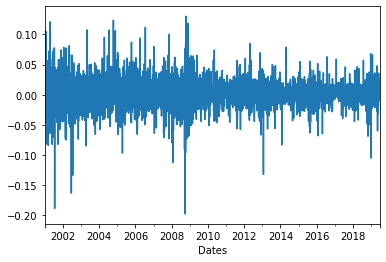

In [30]:
data['1d_rets'].plot()

### 2.5 One-month forward log-returns - outcome/dependent variable

Our main goal is prediction of future returns (as we say earlier, one-month forward returns) based on the information about investment factors.
Next we calculated basic variable for regression - one-month forward log-returns - it's our outcome/dependent variable. 

In [31]:
data['1m_forward_rets']=(np.log(data['PX_LAST'] / data['PX_LAST'].shift(30))).shift(30)

### 2.6 Multinomial variables for classification

We will use multinomial variables for prediction of direction and magnitude of one-month forward returns (in therms of std dev move, i.e multinomial classification).

|Signal description|Condition in terms of st.dev of one-month forward log-returns (r)|
|:---:|:---:|
|Extreme positive returns|r > +2 st.dev|                                                     
|Very bullish|+2 st dev >= r > + 1 st dev|
|Bullish|+1 st dev >= r > +0.01* st dev|
|Neutral|+0.01* st dev >= r >-0.01* st dev|
|Bearish|-0.01*st dev >= r > -1 st dev|
|Very bearish|-1 st dev >= r > - 2 st dev|
|Extreme negative returns|r < - 2 st.dev| 

In [32]:
std_1m=data['1m_forward_rets'].std()

In [33]:
bins_1m=(-2*std_1m,-std_1m,-0.01*std_1m,0.01*std_1m,std_1m,2*std_1m)

In [34]:
bins_1m

(-0.20362764916503215,
 -0.10181382458251607,
 -0.0010181382458251608,
 0.0010181382458251608,
 0.10181382458251607,
 0.20362764916503215)

In [35]:
data['1m_signal']=np.digitize(data['1m_forward_rets'],bins_1m,right=False)

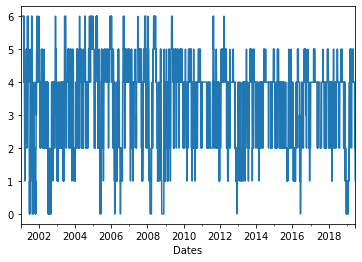

In [36]:
data['1m_signal'].plot()

### 2.7 Factors and factor investing

As we mention erlier we will use ML algorithms to combine the investment factors (as predictors) and forecast future returns (one-month forward returns in our case).
Our investment factors are stock characteristics commonly used by investors (discrete or quantitative) to select stocks. 
Factor investing is an investment approach that involves targeting specific drivers of return across asset classes.
In general, a factor is any characteristic that can explain the risk and return of groups of securities (Ang, 2014).

Factors have a long history in academic literature.
Arbitrage pricing theory (APT) states that esxpected return of an asset can be modelled as linear function of various systematic factors.
In 1992-1993 Eugene Fama and Kenneth French proposed three-factor regression model to explain stock return premium. 
The Fama-French model successfully demonstrated that US equity market returns can be explained by the market, size and value factors, and is perhaps the best-known academic work on the subject.

There are many types of factors that have driven returns of stocks, bonds, and other instruments (growth, momentum, quality,risk, sentiment, size, value, etc). See for example (Zhou, Jain, 2014), (Qian, etc, 2007) and (Zoonekynd, etc, 2016)

### 2.8 Risk/Reversal factors

Risk factors helps identify drivers of equity risk premium. Such premium should reflects price of risk and the amount of risk (Ilmanen, 2011). Factors are based on past volatility ('risk_vol') and other characterisctics of the returns distribution such as skew, etc ('risk_skew').
Example of particulary interesting and relatively new in academic literature factor is the "lottery factor". In 2017 Turan Bali, Stephen Brown, Scott Murray and Yi Tang (Bali, etc 2017) shows that "Lottery investors generate demand for stocks with high probabilities of large short-term up moves in the stock price. Such up moves are partially generated by a stock’s sensitivity to the overall market—market beta. A disproportionately high (low) amount of lottery demand-based price pressure is therefore exerted on high-beta (low-beta) stocks, pushing the prices of such stocks up (down) and therefore decreasing (increasing) future returns.”
As a proxy for lottery demand Bali,etc uses a measure called MAX which is the average of the ﬁve highest daily returns of the given stock in the given month (see "risk_lottery" factor).

In [37]:
data['risk_1w']=np.log(data['PX_LAST'] / data['PX_LAST'].shift(7))

In [38]:
data['risk_1m']=np.log(data['PX_LAST'] / data['PX_LAST'].shift(30))

In [39]:
data['risk_lottery']=data['1d_rets'].rolling(30).apply(lambda x: np.mean(sorted(x,reverse=True)[:5]), raw=True)

In [40]:
data['risk_skew']=data['1d_rets'].rolling(window=365).skew()

In [41]:
data['risk_vol']=data['1d_rets'].rolling(window=365).std()*np.sqrt(365)

In [42]:
data['risk_c-range']=data['PX_LAST'].rolling(window=365).max()/data['PX_LAST'].rolling(window=365).min()

### 2.9 Momentum factors

Momentum factors use past prices and volume information to predict future security returns. 
Price momentum well documented by academic researchers who applied statistical techniques to asses trends and reveresals.
There are various theories (mostly behavorial) to justify existence of such price patterns.

In [43]:
data['momentum_1y']=np.log(data['PX_LAST'] / data['PX_LAST'].shift(365))

In [44]:
data['momentum_3m']=np.log(data['PX_LAST'] / data['PX_LAST'].shift(90))

In [45]:
data['momentum_6m']=np.log(data['PX_LAST'] / data['PX_LAST'].shift(180))

In [46]:
data['p_52w_high']=data['PX_LAST']/data['PX_LAST'].rolling(window=365).max()

In [47]:
data['p_52w_low']=data['PX_LAST']/data['PX_LAST'].rolling(window=365).min()

In [48]:
data['p_3m_av']=data['PX_LAST'].rolling(window=90).mean()

In [49]:
data['p_6m_av']=data['PX_LAST'].rolling(window=180).mean()

In [50]:
data['momentum_3-6_ma']=np.where(data['p_3m_av']>data['p_6m_av'],1,-1)

### 2.10 Quality factors

Quality factors asses firm's ability to create shareholders value in the future based on information reported in financial statements. They identify companies whose operations are sufficiently competetive to generate high business profits, and whose management competent in translating effective decisions into profits.  

Debt-to-Market Value of equity

In [51]:
data['quality_D_MV']=(data['BS_LT_BORROW']+ data['BS_ST_BORROW'])/ data['CUR_MKT_CAP']

Return on assets

In [52]:
data['quality_ROA']=data['Net_income_12m']/data['BS_TOT_ASSET']

EBITDA margin

In [53]:
data['quality_EBITDA_marg']=data['EBITDA']/data['SALES_REV_TURN']

Gross margin

In [54]:
data['quality_Gross_m']=data['GROSS_PROFIT']/data['SALES_REV_TURN']

Accrurals to assets

In [55]:
data['quality_Accr']=(data['Net_income_12m']-data['CF_CASH_FROM_OPER_12m'])/data['BS_TOT_ASSET']

Sales-to-Total Assets

In [56]:
data['quality_Sales_TA']=data['SALES_REV_TURN_12m']/data['BS_TOT_ASSET']

### 2.11 Growth factors

Asset price reflects its expected future cash flows. And growth factors helps identify a firm with fast-growing 
future cash flows (which deserves a higher price) or a firm with poor growth prospects.

Asset Growth

In [57]:
data['growth_asset']=(data['BS_TOT_ASSET']-data['BS_TOT_ASSET'].shift(252))/data['BS_TOT_ASSET'].shift(252)

Sales growth

In [58]:
data['growth_sales']=(data['SALES_REV_TURN']-data['SALES_REV_TURN'].shift(252))/data['SALES_REV_TURN'].shift(252)

EBITDA growth

In [59]:
data['growth_EBITDA']=(data['EBITDA']-data['EBITDA'].shift(252))/data['EBITDA'].shift(252)

EPS Growth

In [60]:
data['growth_EPS']=(data['EPS_Annualized']-data['EPS_Annualized'].shift(252))/data['EPS_Annualized'].shift(252)

Change in gross margin

In [61]:
data['growth_Gross_m']=data['quality_Gross_m']-data['quality_Gross_m'].shift(252)

Change in ROA

In [62]:
data['growth_ROA']=data['quality_ROA']-data['quality_ROA'].shift(252)

### 2.12 Value factors

Value factors helps investors to identify stocks that have relatively low (or high) prices based on ratios deflated by fundamental criteria
such as dividends, book value, earnings, cash flows, or other measures of firm value (in the sense of Benjamin Graham).

Sales/EV

In [63]:
data['Value_Sales_EV']=data['SALES_REV_TURN_12m']/data['ENTERPRISE_VALUE']

EBITDA/EV

In [64]:
data['Value_EBITDA_EV']=data['EBITDA_12m']/data['ENTERPRISE_VALUE']

FCV/EV

In [65]:
data['Value_FCV_EV']=data['CF_FREE_CASH_FLOW_12m']/data['ENTERPRISE_VALUE']

Sales to Price

In [66]:
data['Value_S_P']=data['SALES_REV_TURN_12m']/data['CUR_MKT_CAP']

Gross profit/EV

In [67]:
data['Value_GP_EV']=data['GROSS_PROFIT_12m']/data['ENTERPRISE_VALUE']

FCV yield

In [68]:
data['Value_FCV_yld']=data['CF_FREE_CASH_FLOW_12m']/data['CUR_MKT_CAP']

### 2.13 Features aggregation

Now we aggregate our features in one data set of predictors. And after this explore the training set to understand the charcteristics of the data prior to modeling.

In [69]:
drops=['PX_LAST', 'BS_LT_BORROW','BS_ST_BORROW','BS_TOT_ASSET','CF_CASH_FROM_OPER','EBITDA','EQY_SH_OUT','EPS_Annualized','IS_Diluted_EPS','Net_income','IS_EPS','IS_INC_BEF_XO_ITEM','SALES_REV_TURN','Current_EV_to_t12m_ebitda','CUR_MKT_CAP','PX_VOLUME','CASH_AND_MARKETABLE_SECURITIES','GROSS_PROFIT','CF_FREE_CASH_FLOW','ENTERPRISE_VALUE','TOT_COMMON_EQY','BOOK_VAL_PER_SH','Net_income_12m', 'CF_CASH_FROM_OPER_12m', 'EBITDA_12m', 'SALES_REV_TURN_12m','GROSS_PROFIT_12m','CF_FREE_CASH_FLOW_12m','1m_forward_rets','1m_signal']

In [70]:
features=data.drop(drops, axis=1)

In [71]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6749 entries, 2001-01-01 to 2019-06-24
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PX_TO_BOOK_RATIO     6749 non-null   float64
 1   PE_RATIO             6749 non-null   float64
 2   PX_TO_CASH_FLOW      6749 non-null   float64
 3   1d_rets              6749 non-null   float64
 4   risk_1w              6742 non-null   float64
 5   risk_1m              6719 non-null   float64
 6   risk_lottery         6720 non-null   float64
 7   risk_skew            6385 non-null   float64
 8   risk_vol             6385 non-null   float64
 9   risk_c-range         6385 non-null   float64
 10  momentum_1y          6384 non-null   float64
 11  momentum_3m          6659 non-null   float64
 12  momentum_6m          6569 non-null   float64
 13  p_52w_high           6385 non-null   float64
 14  p_52w_low            6385 non-null   float64
 15  p_3m_av             

In [72]:
features=features.dropna()

In [73]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6384 entries, 2002-01-01 to 2019-06-24
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PX_TO_BOOK_RATIO     6384 non-null   float64
 1   PE_RATIO             6384 non-null   float64
 2   PX_TO_CASH_FLOW      6384 non-null   float64
 3   1d_rets              6384 non-null   float64
 4   risk_1w              6384 non-null   float64
 5   risk_1m              6384 non-null   float64
 6   risk_lottery         6384 non-null   float64
 7   risk_skew            6384 non-null   float64
 8   risk_vol             6384 non-null   float64
 9   risk_c-range         6384 non-null   float64
 10  momentum_1y          6384 non-null   float64
 11  momentum_3m          6384 non-null   float64
 12  momentum_6m          6384 non-null   float64
 13  p_52w_high           6384 non-null   float64
 14  p_52w_low            6384 non-null   float64
 15  p_3m_av             

### 2.14 Predictors review

In [74]:
import seaborn as sns

In [75]:
momentum=['momentum_1y','momentum_3m','momentum_6m','p_3m_av','p_6m_av','p_52w_low','p_52w_high','momentum_3-6_ma','1m_forward_rets']

In [76]:
data=data.dropna()

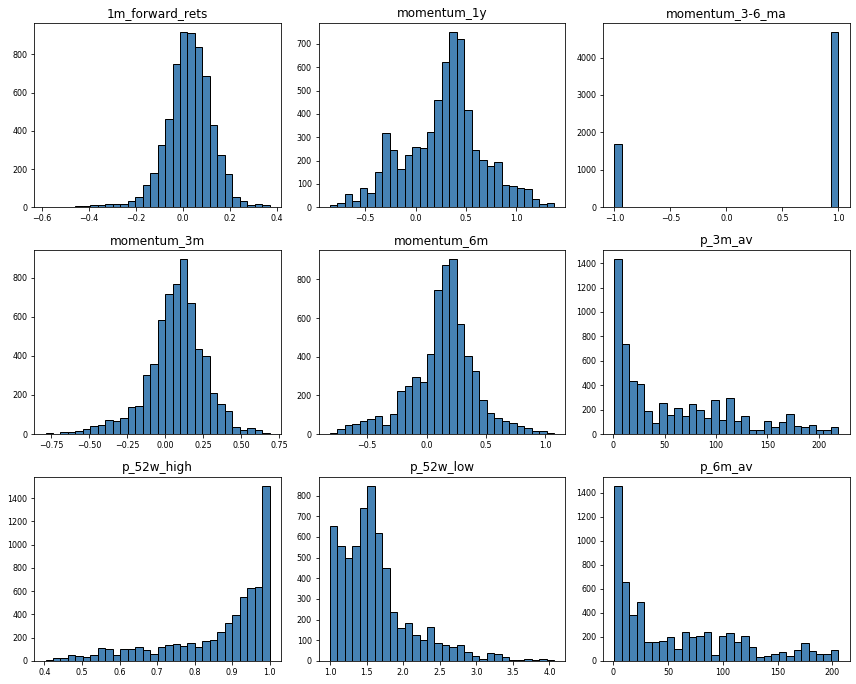

In [77]:
data[momentum].hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False,figsize=(10, 8))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

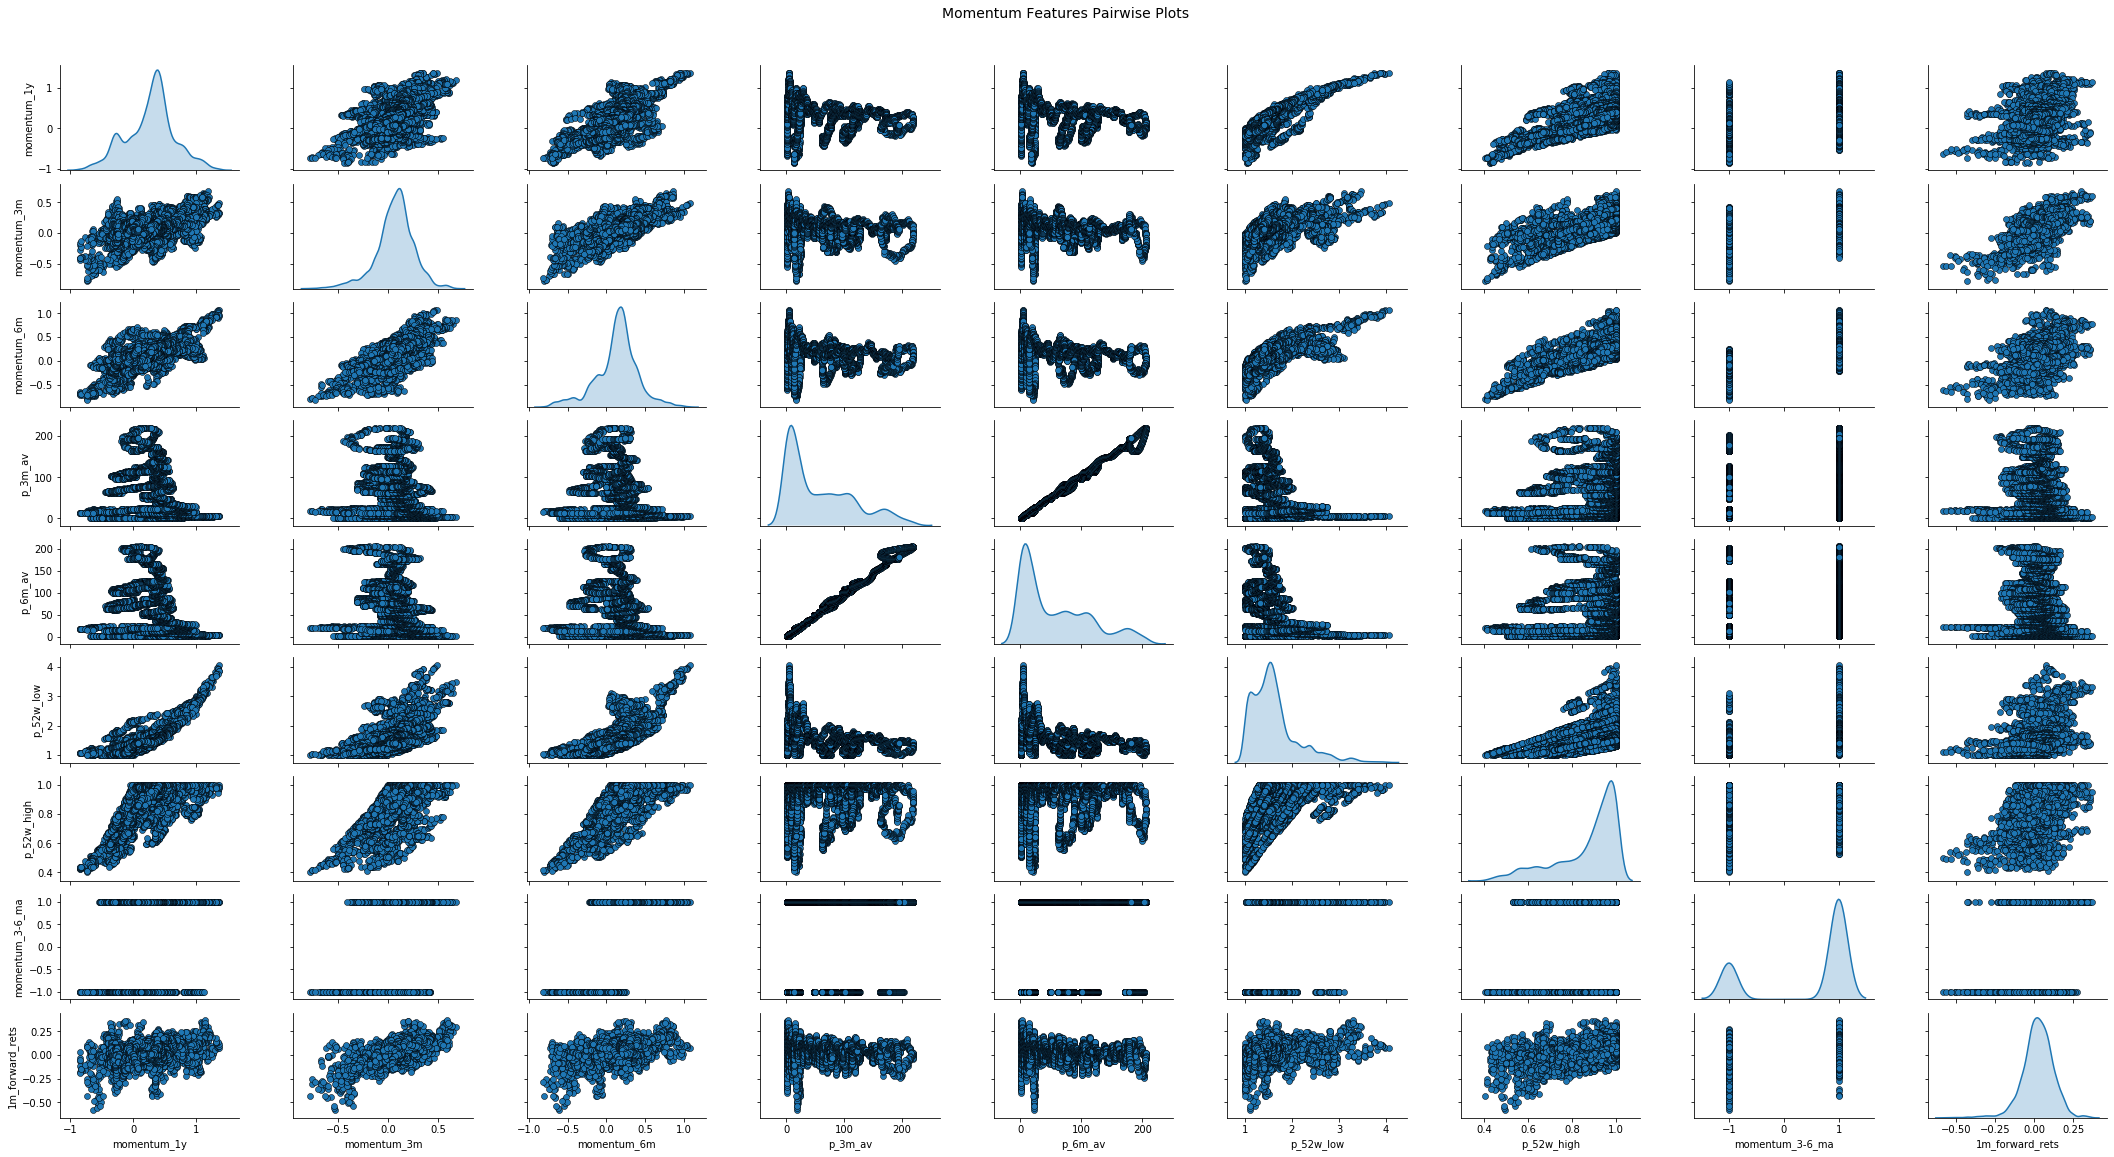

In [78]:
pp = sns.pairplot(data[momentum], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Momentum Features Pairwise Plots', fontsize=14)

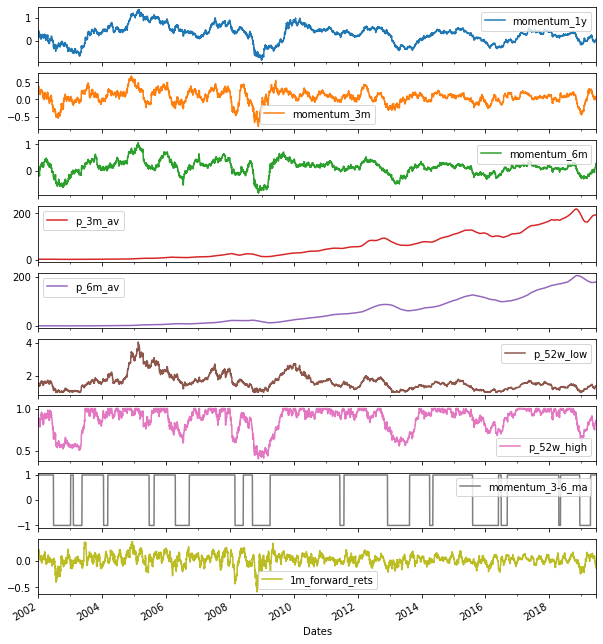

In [79]:
data[momentum].plot(figsize=(10, 12), subplots=True);  

In [80]:
risk=['risk_1w','risk_1m','risk_lottery','risk_skew','risk_vol','risk_c-range','1m_forward_rets']

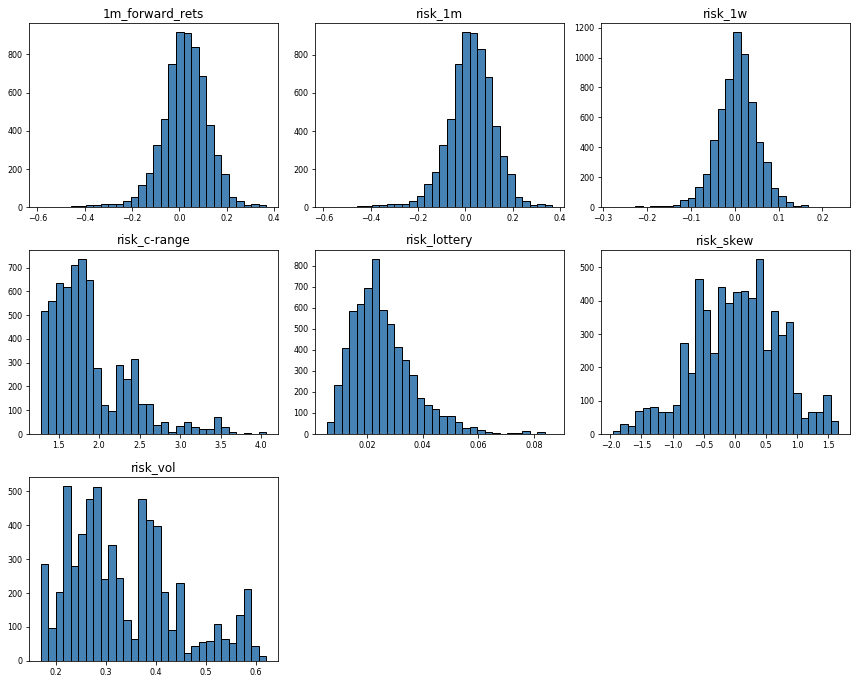

In [81]:
data[risk].hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False,figsize=(10, 8))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

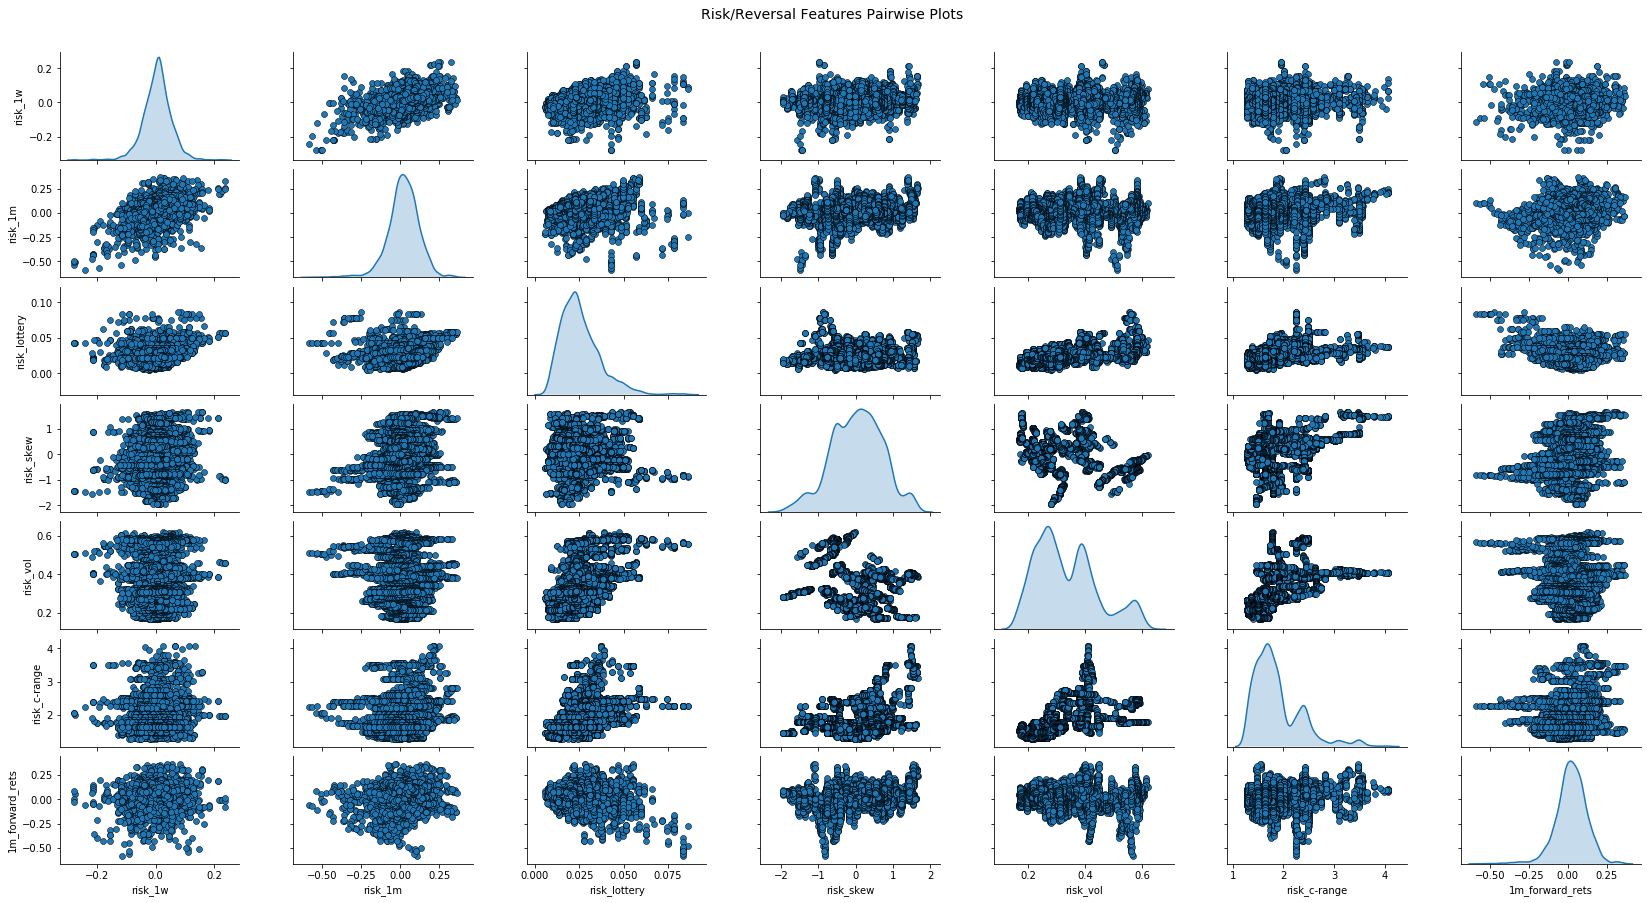

In [82]:
pp = sns.pairplot(data[risk], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Risk/Reversal Features Pairwise Plots', fontsize=14)

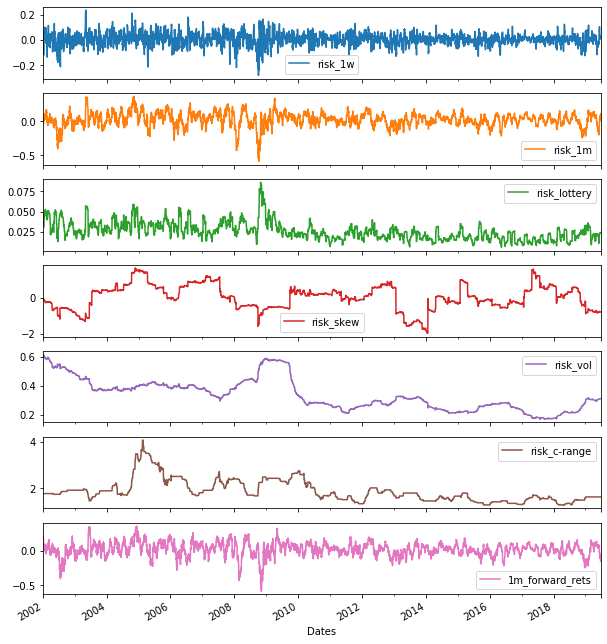

In [83]:
data[risk].plot(figsize=(10, 12), subplots=True);  

In [84]:
quality=['quality_D_MV', 'quality_ROA','quality_EBITDA_marg','quality_Gross_m','quality_Accr','quality_Sales_TA','1m_forward_rets']

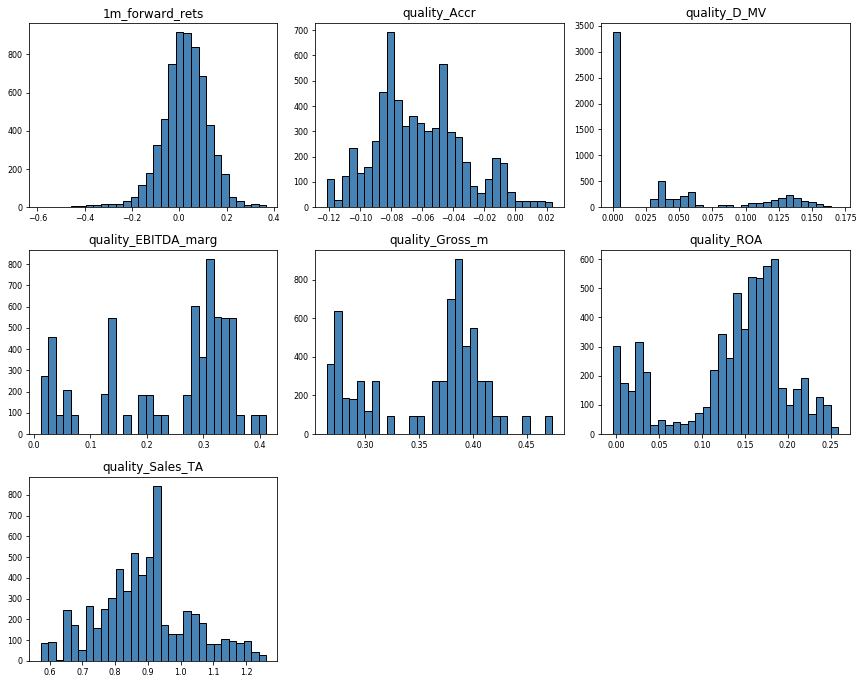

In [85]:
data[quality].hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False,figsize=(10, 8))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

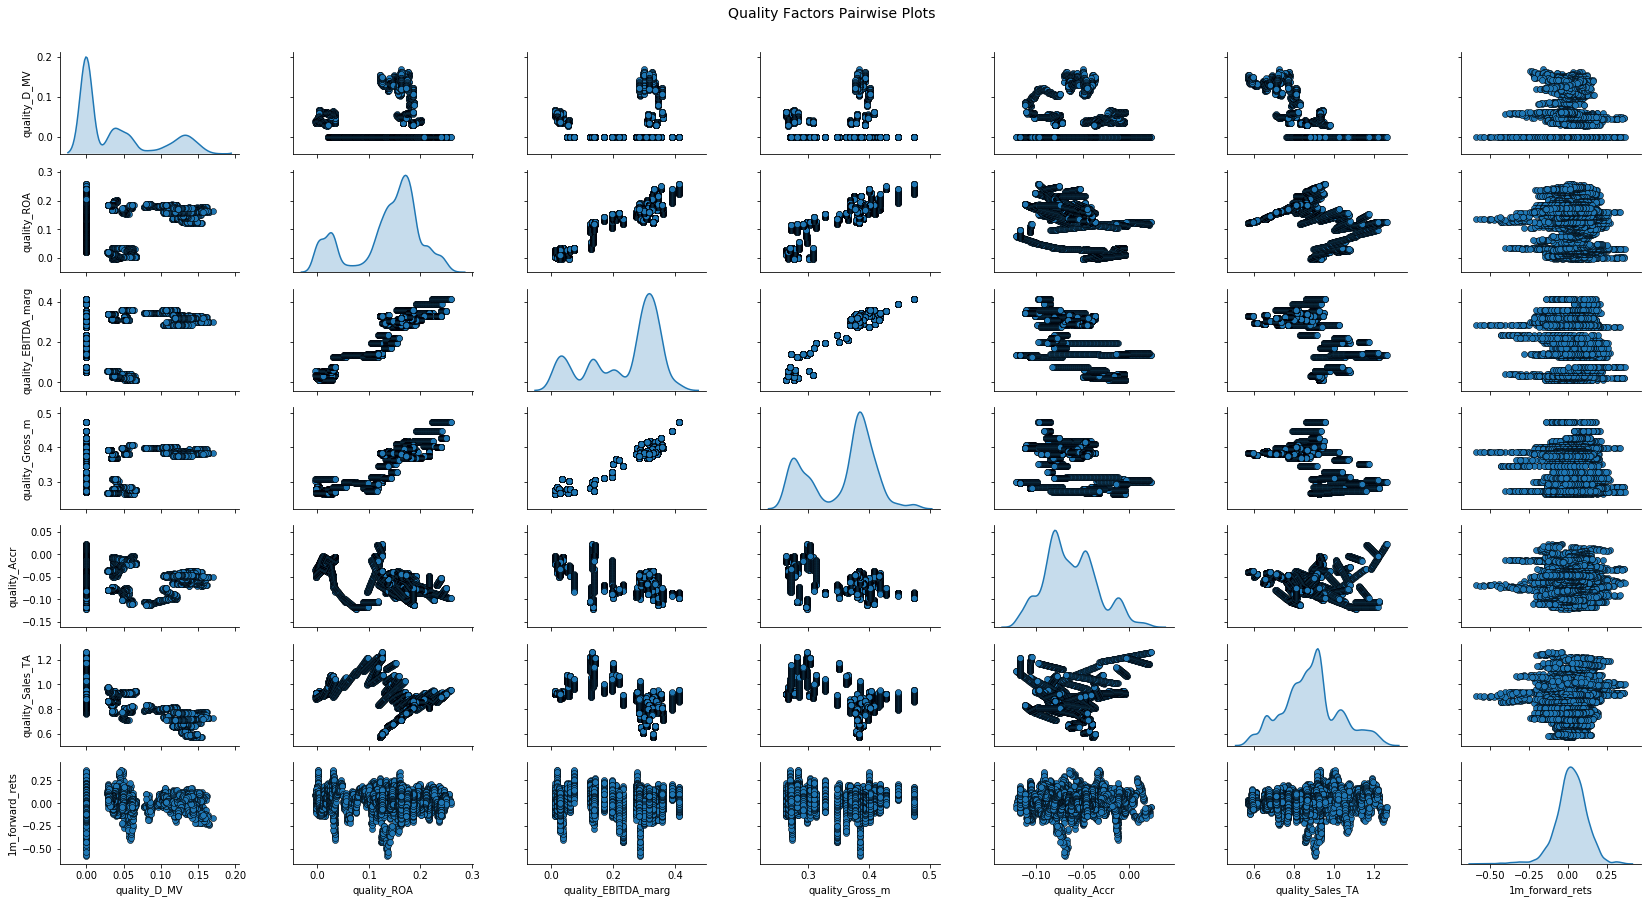

In [86]:
pp = sns.pairplot(data[quality], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Quality Factors Pairwise Plots', fontsize=14)

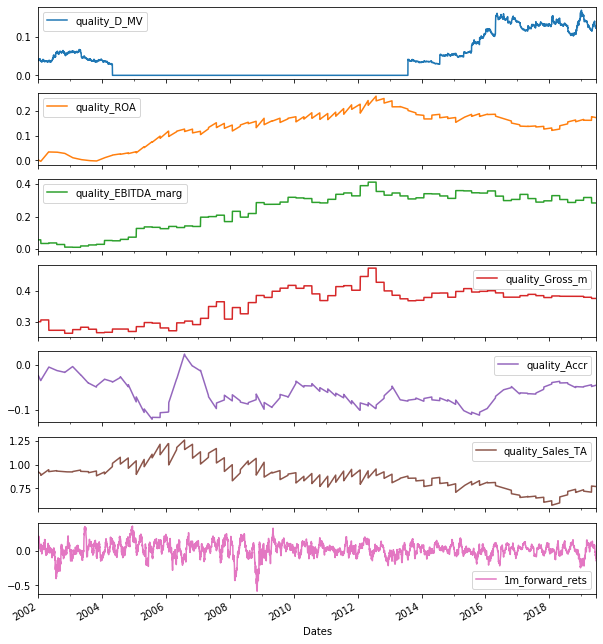

In [87]:
data[quality].plot(figsize=(10, 12), subplots=True);  

In [88]:
growth=['growth_asset','growth_sales','growth_EBITDA','growth_EPS','growth_Gross_m','growth_ROA','1m_forward_rets']

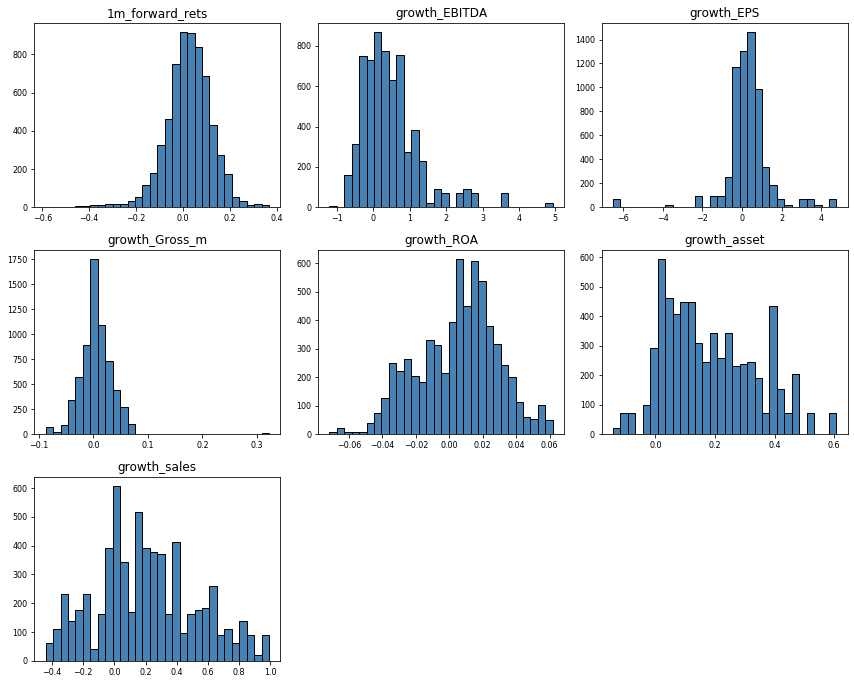

In [89]:
data[growth].hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False,figsize=(10, 8))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

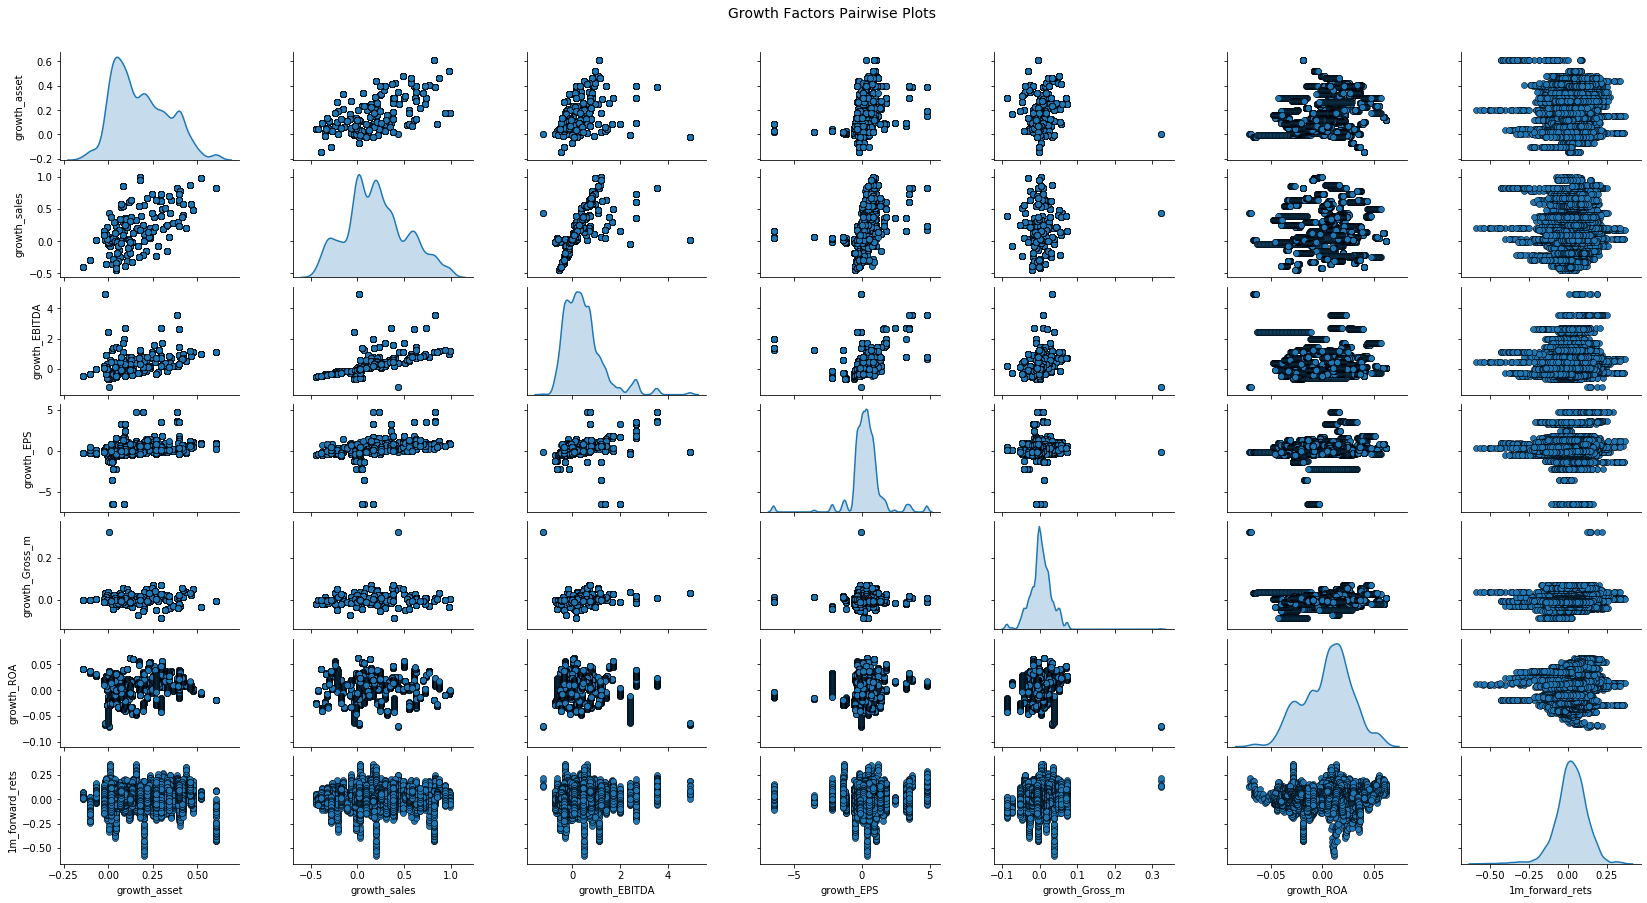

In [90]:
pp = sns.pairplot(data[growth], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Growth Factors Pairwise Plots', fontsize=14)

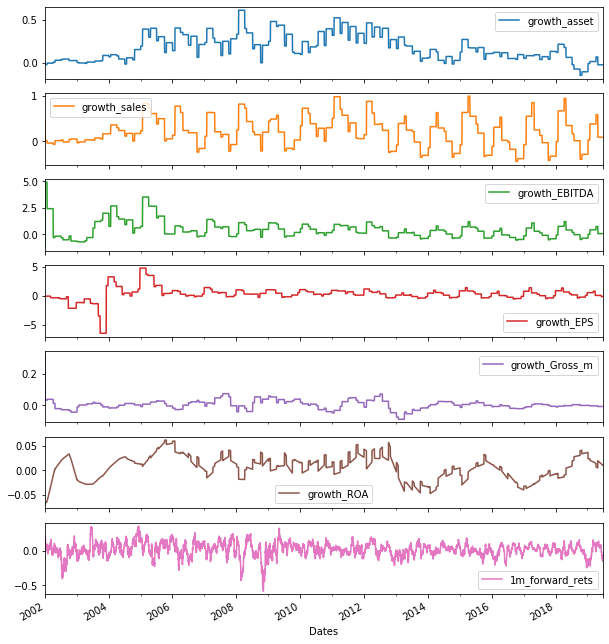

In [91]:
data[growth].plot(figsize=(10, 12), subplots=True);  

In [92]:
value=['Value_Sales_EV','Value_EBITDA_EV','Value_FCV_EV', 'Value_S_P', 'Value_GP_EV', 'Value_FCV_yld','1m_forward_rets']

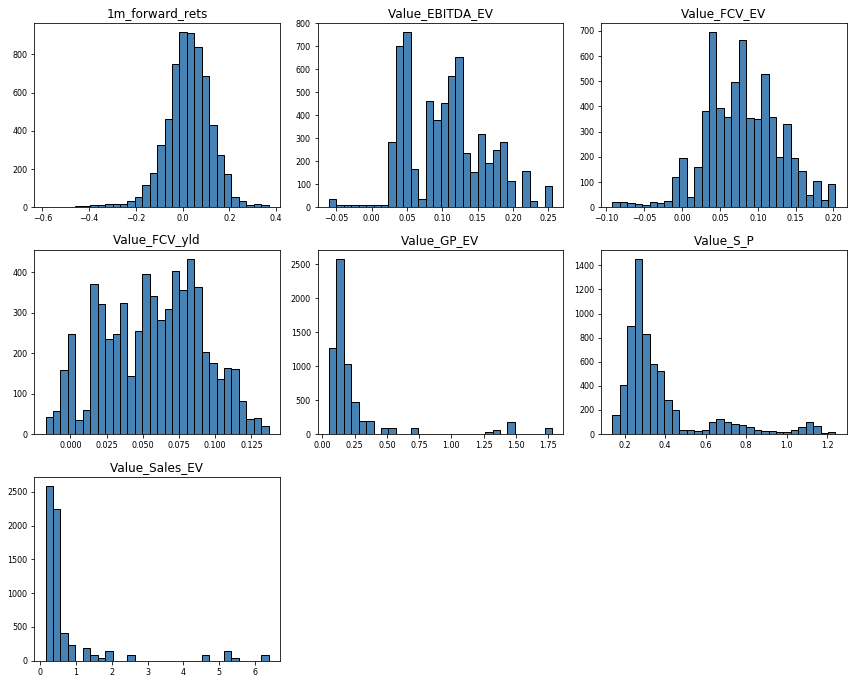

In [93]:
data[value].hist(bins=30, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False,figsize=(10, 8))    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

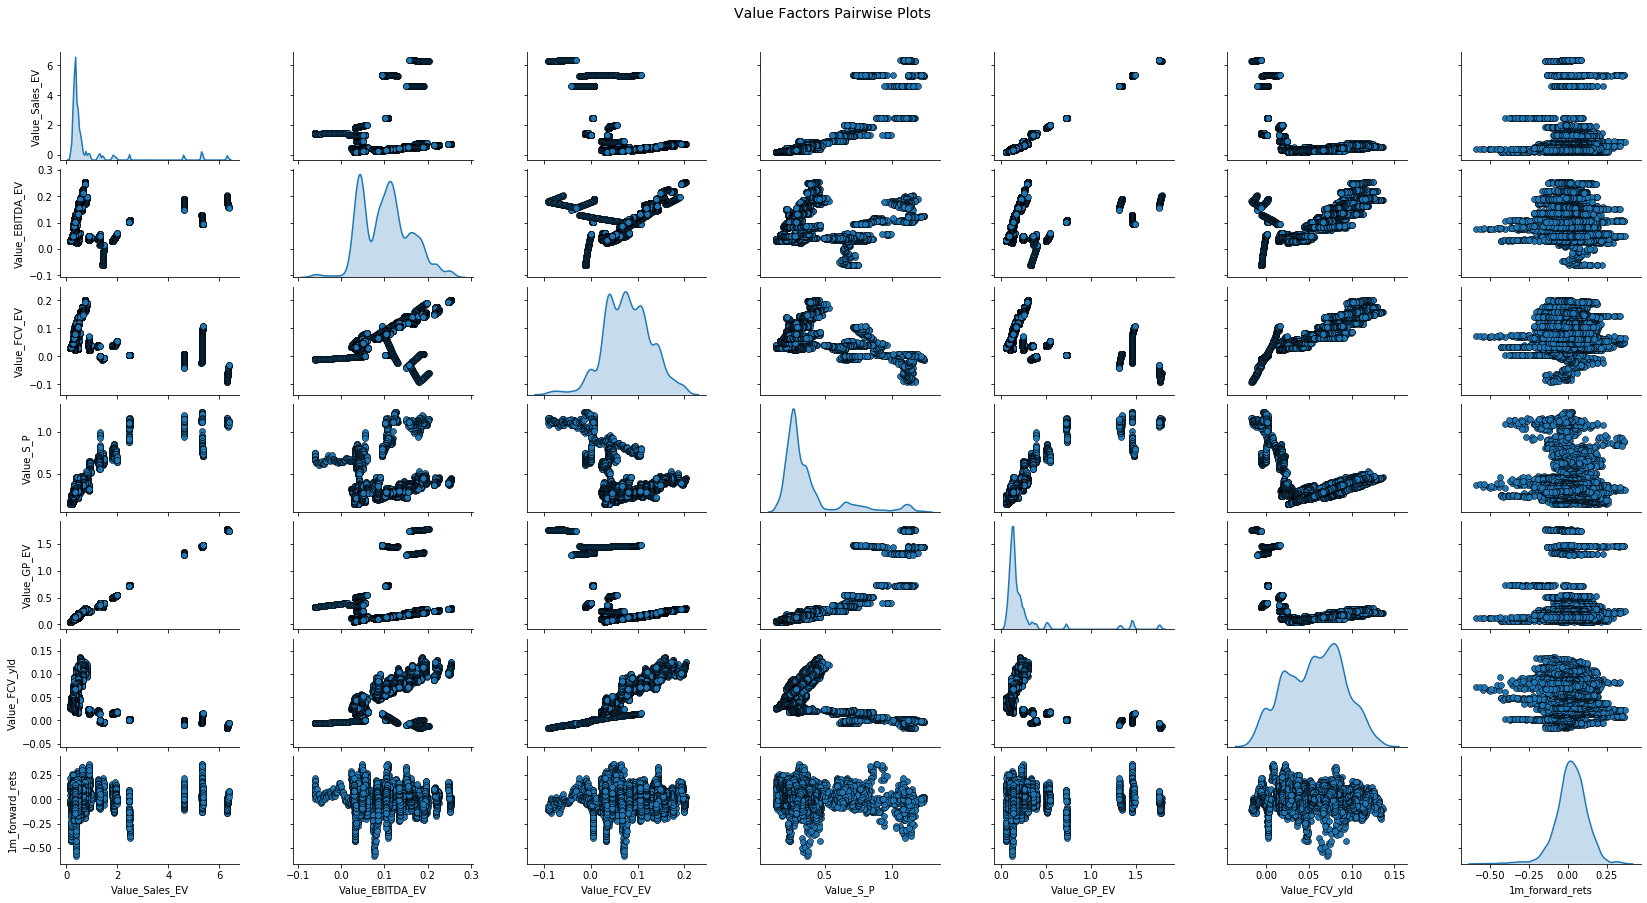

In [94]:
pp = sns.pairplot(data[value], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Value Factors Pairwise Plots', fontsize=14)

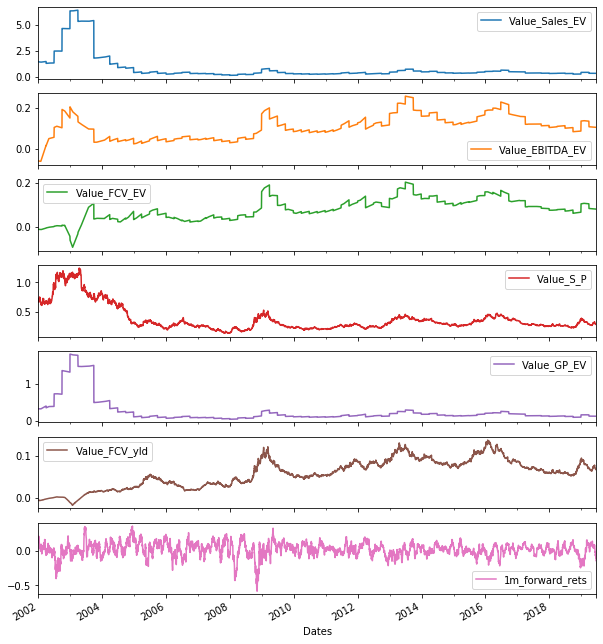

In [95]:
data[value].plot(figsize=(10, 12), subplots=True);  

As we see plots of the data shows that there exist a nonlinear relationships (as long as linear ones) between the outcome (one-month forward returns) and the some predictors. 
Given this knowledge, we might think that linear models would work only for some part of the predictors and wouldn't for others (i.e. linear model will capture only partial information of our features data set).

Another needed transformations must resolve skewness of the mostly parts of predictors.
Replacing the data with the log, square root or Box-Cox transformation may help to remove the skew.
Of course after the transformation, the distribution will be not entirely symmetric but better behaved than before than transformation.

### 2.15 Between-predictor correlations. Removing correlated predictors.

Before we applied transformations to features we must do the correlation analysis of our predictors. There are several good reasons to avoid data with highly correlated predictors. Such predictors add more complexity than "valuable" information to the model. Fewer uncorrelated predictors is better in therms of cost (time, etc). Using highly correlated predictors in techniques like linear regression can result in unstable models, numerical errors, and as reasult poorer predictive performance.

Standard approach to dealing with this issue is "blind" removing of the minimum number of predictors to ensure that all pairwise correlations are below a certain threshold (in our case is less than 0.75). 

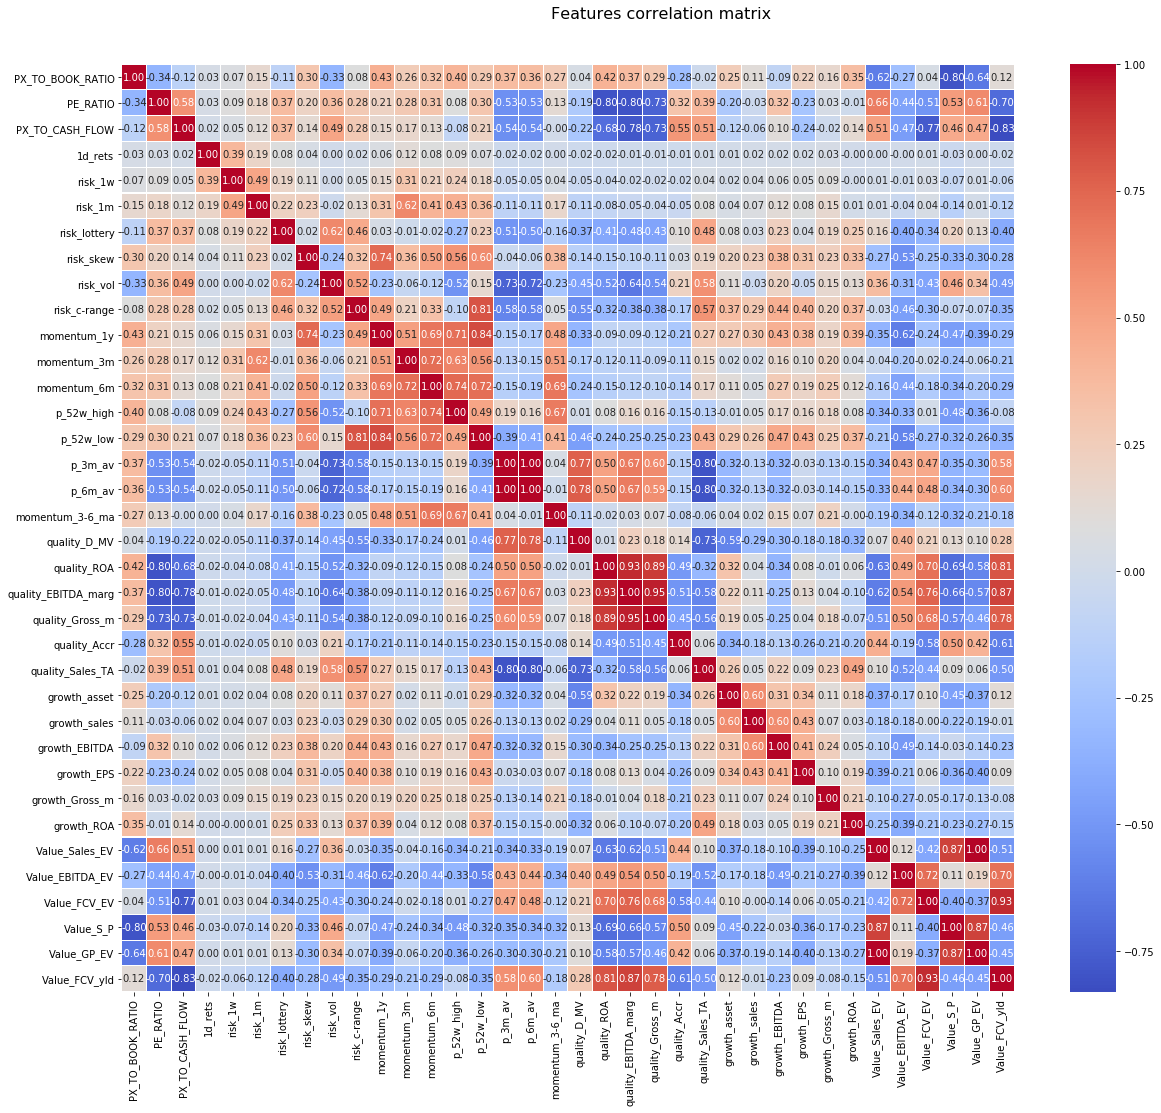

In [96]:
f, ax = plt.subplots(figsize=(20, 16))
corr = features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features correlation matrix', fontsize=16)

In [97]:
corr_matrix=corr.abs()

In [98]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [99]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [100]:
to_drop

['p_52w_low',
 'p_6m_av',
 'quality_D_MV',
 'quality_EBITDA_marg',
 'quality_Gross_m',
 'Value_FCV_EV',
 'Value_S_P',
 'Value_GP_EV',
 'Value_FCV_yld']

But we will use a slightly modified approach based on (Kunm, Johnson, 2013).

In short, the algorithm is as follows:
1. Calculate the correlation matrix of the predictors.
2. Determine the two predictors associated with the largest absolute pairwise
correlation (call them predictors A and B).
3. Determine the average correlation between A and the other variables. Do the same for predictor B.
4. If A has a larger average correlation, remove it; otherwise, remove B.
5. Repeat Steps 2–4 until no absolute correlations are above the threshold (0.75 or less).

In [101]:
corr_matrix['average_corr']=np.mean(corr_matrix, axis=1)

In [102]:
corr_matrix

PX_TO_BOOK_RATIO  PE_RATIO  PX_TO_CASH_FLOW   1d_rets  \
PX_TO_BOOK_RATIO             1.000000  0.335660         0.122889  0.026104   
PE_RATIO                     0.335660  1.000000         0.582996  0.031872   
PX_TO_CASH_FLOW              0.122889  0.582996         1.000000  0.020788   
1d_rets                      0.026104  0.031872         0.020788  1.000000   
risk_1w                      0.069316  0.086582         0.052538  0.385017   
risk_1m                      0.146386  0.183366         0.116427  0.190674   
risk_lottery                 0.114651  0.368097         0.365076  0.082645   
risk_skew                    0.299951  0.198243         0.135308  0.043707   
risk_vol                     0.334374  0.362285         0.487131  0.001955   
risk_c-range                 0.079008  0.281910         0.284750  0.018165   
momentum_1y                  0.434681  0.212607         0.151212  0.057195   
momentum_3m                  0.257047  0.276442         0.173994  0.116632   
momentum_6m                  0.315704  0.311414         0.128053  0.075956   
p_52w_high                   0.397251  0.080191         0.077256  0.094260   
p_52w_low                    0.290668  0.300990         0.212493  0.069236   
p_3m_av                      0.371084  0.525926         0.538815  0.020889   
p_6m_av                      0.356993  0.528973         0.544562  0.019986   
momentum_3-6_ma              0.265159  0.129729         0.002464  0.003553   
quality_D_MV                 0.043741  0.190335         0.223182  0.019407   
quality_ROA                  0.422315  0.803153         0.676977  0.015401   
quality_EBITDA_marg          0.373439  0.801014         0.782796  0.007954   
quality_Gross_m              0.288850  0.732942         0.726501  0.006614   
quality_Accr                 0.276494  0.324832         0.554490  0.005743   
quality_Sales_TA             0.018785  0.385292         0.511964  0.012123   
growth_asset                 0.253503  0.202227         0.122466  0.008386   
growth_sales                 0.105609  0.032671         0.057146  0.018248   
growth_EBITDA                0.094792  0.316135         0.097824  0.021343   
growth_EPS                   0.217341  0.225875         0.242517  0.019428   
growth_Gross_m               0.164564  0.034837         0.018274  0.033684   
growth_ROA                   0.347726  0.013645         0.135137  0.000719   
Value_Sales_EV               0.623152  0.656477         0.511457  0.002962   
Value_EBITDA_EV              0.268356  0.443694         0.474523  0.002174   
Value_FCV_EV                 0.040809  0.512742         0.770426  0.010435   
Value_S_P                    0.799857  0.532710         0.460528  0.026364   
Value_GP_EV                  0.636331  0.613048         0.471805  0.001854   
Value_FCV_yld                0.124279  0.704039         0.826273  0.023198   

                      risk_1w   risk_1m  risk_lottery  risk_skew  risk_vol  \
PX_TO_BOOK_RATIO     0.069316  0.146386      0.114651   0.299951  0.334374   
PE_RATIO             0.086582  0.183366      0.368097   0.198243  0.362285   
PX_TO_CASH_FLOW      0.052538  0.116427      0.365076   0.135308  0.487131   
1d_rets              0.385017  0.190674      0.082645   0.043707  0.001955   
risk_1w              1.000000  0.493827      0.192405   0.112660  0.001137   
risk_1m              0.493827  1.000000      0.224782   0.226436  0.020881   
risk_lottery         0.192405  0.224782      1.000000   0.018629  0.620399   
risk_skew            0.112660  0.226436      0.018629   1.000000  0.235201   
risk_vol             0.001137  0.020881      0.620399   0.235201  1.000000   
risk_c-range         0.054583  0.125513      0.457504   0.321804  0.523565   
momentum_1y          0.146866  0.308516      0.033457   0.736933  0.226481   
momentum_3m          0.310777  0.619855      0.012571   0.361320  0.058271   
momentum_6m          0.205101  0.414694      0.021418   0.503687  0.117016   
p_52w_high           0.235591  0.427093   

In [103]:
corr_features=['p_52w_high','p_52w_low','p_6m_av','p_3m_av','quality_EBITDA_marg','quality_Gross_m','Value_S_P','Value_FCV_yld','Value_Sales_EV']

In [104]:
features=features.drop(corr_features, axis=1)

In [105]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6384 entries, 2002-01-01 to 2019-06-24
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PX_TO_BOOK_RATIO  6384 non-null   float64
 1   PE_RATIO          6384 non-null   float64
 2   PX_TO_CASH_FLOW   6384 non-null   float64
 3   1d_rets           6384 non-null   float64
 4   risk_1w           6384 non-null   float64
 5   risk_1m           6384 non-null   float64
 6   risk_lottery      6384 non-null   float64
 7   risk_skew         6384 non-null   float64
 8   risk_vol          6384 non-null   float64
 9   risk_c-range      6384 non-null   float64
 10  momentum_1y       6384 non-null   float64
 11  momentum_3m       6384 non-null   float64
 12  momentum_6m       6384 non-null   float64
 13  momentum_3-6_ma   6384 non-null   int64  
 14  quality_D_MV      6384 non-null   float64
 15  quality_ROA       6384 non-null   float64
 16  quality_Accr      6384 n

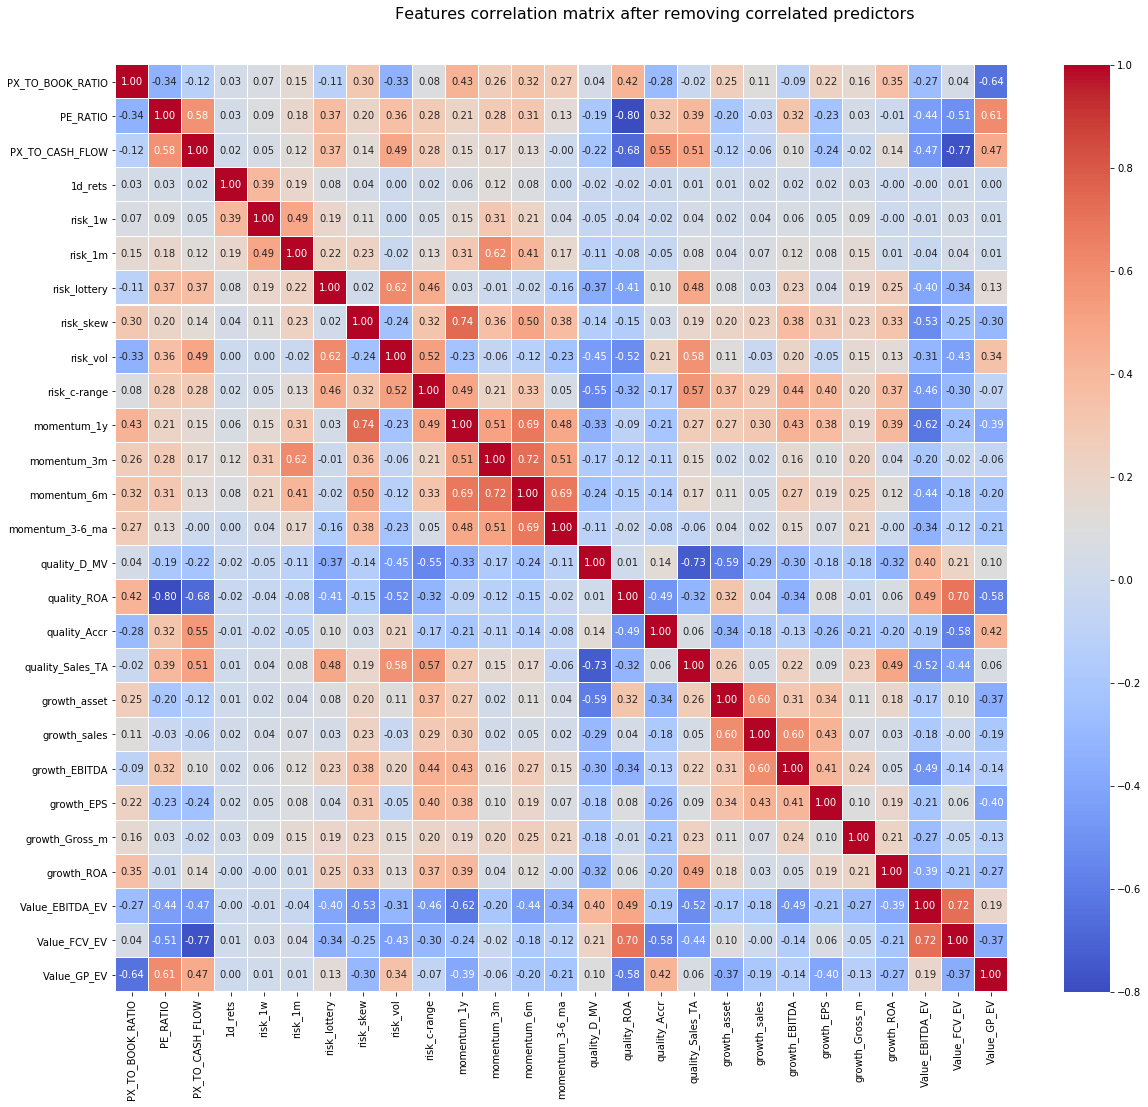

In [106]:
f, ax = plt.subplots(figsize=(20, 16))
corr = features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Features correlation matrix after removing correlated predictors', fontsize=16)

In [107]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

[]

In [108]:
features=features.dropna()

In [109]:
features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6384 entries, 2002-01-01 to 2019-06-24
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PX_TO_BOOK_RATIO  6384 non-null   float64
 1   PE_RATIO          6384 non-null   float64
 2   PX_TO_CASH_FLOW   6384 non-null   float64
 3   1d_rets           6384 non-null   float64
 4   risk_1w           6384 non-null   float64
 5   risk_1m           6384 non-null   float64
 6   risk_lottery      6384 non-null   float64
 7   risk_skew         6384 non-null   float64
 8   risk_vol          6384 non-null   float64
 9   risk_c-range      6384 non-null   float64
 10  momentum_1y       6384 non-null   float64
 11  momentum_3m       6384 non-null   float64
 12  momentum_6m       6384 non-null   float64
 13  momentum_3-6_ma   6384 non-null   int64  
 14  quality_D_MV      6384 non-null   float64
 15  quality_ROA       6384 non-null   float64
 16  quality_Accr      6384 n

In [110]:
features.head()

PX_TO_BOOK_RATIO  PE_RATIO  PX_TO_CASH_FLOW   1d_rets   risk_1w  \
Dates                                                                         
2002-01-01            1.9463   38.4211          32.1271  0.000000  0.024985   
2002-01-02            2.0707   40.8772          34.1809  0.061966  0.080874   
2002-01-03            2.0956   41.3684          34.5916  0.011945  0.066206   
2002-01-04            2.1053   41.5614          34.7530  0.004620  0.054655   
2002-01-05            2.1053   41.5614          34.7530  0.000000  0.054655   

             risk_1m  risk_lottery  risk_skew  risk_vol  risk_c-range  ...  \
Dates                                                                  ...   
2002-01-01  0.027807      0.039002  -0.029701  0.617818      1.787576  ...   
2002-01-02  0.101542      0.047655  -0.026843  0.620812      1.775047  ...   
2002-01-03  0.051346      0.038967  -0.077120  0.613588      1.775047  ...   
2002-01-04 -0.002951      0.030581  -0.073634  0.612273      1.775047  ...   
2002-01-05  0.039171      0.030581  -0.078504  0.610817      1.775047  ...   

            quality_Sales_TA  growth_asset  growth_sales  growth_EBITDA  \
Dates                                                                     
2002-01-01          0.924215      0.005847      0.439921      -1.209596   
2002-01-02          0.923440      0.005847      0.439921      -1.209596   
2002-01-03          0.922665      0.005847      0.439921      -1.209596   
2002-01-04          0.921890      0.005847      0.439921      -1.209596   
2002-01-05          0.921115      0.005847      0.439921      -1.209596   

            growth_EPS  growth_Gross_m  growth_ROA  Value_EBITDA_EV  \
Dates                                                                 
2002-01-01   -0.084548        0.322233   -0.071659        -0.058891   
2002-01-02   -0.084548        0.322233   -0.071149        -0.058945   
2002-01-03   -0.084548        0.322233   -0.070639        -0.059000   
2002-01-04   -0.084548        0.322233   -0.070130        -0.059055   
2002-01-05   -0.084548        0.322233   -0.069620        -0.059110   

            Value_FCV_EV  Value_GP_EV  
Dates                                  
2002-01-01     -0.010841     0.327631  
2002-01-02     -0.010884     0.327545  
2002-01-03     -0.010928     0.327458  
2002-01-04     -0.010971     0.327372  
2002-01-05     -0.011014     0.327285  

[5 rows x 27 columns]

In [111]:
features.skew()

PX_TO_BOOK_RATIO    0.147484
PE_RATIO            2.563375
PX_TO_CASH_FLOW     1.937862
1d_rets            -0.170398
risk_1w            -0.307946
risk_1m            -0.667115
risk_lottery        1.231118
risk_skew          -0.164138
risk_vol            0.678174
risk_c-range        1.439366
momentum_1y        -0.148616
momentum_3m        -0.566617
momentum_6m        -0.397645
momentum_3-6_ma    -1.056806
quality_D_MV        0.996980
quality_ROA        -0.722695
quality_Accr        0.393628
quality_Sales_TA    0.230651
growth_asset        0.480336
growth_sales        0.292275
growth_EBITDA       1.678854
growth_EPS         -1.172429
growth_Gross_m      1.027380
growth_ROA         -0.252641
Value_EBITDA_EV     0.269117
Value_FCV_EV       -0.092593
Value_GP_EV         3.304901
dtype: float64

### 2.16 Features transformation. Resolving skewness of the features data.

Now as we mention above we must apply transformation to resolve skewness of the features data set.

Box and Cox (1964) propose statistical method that can be used to empirically identify an appropriate transformation for reducing the skewness of data. There a family of transformations that are indexed by a parameter λ.
In addition to the log transformation, this family can identify square transformation (λ = 2), square root (λ = 0.5), inverse (λ = −1), and others in-between. λ can be estimated using the training data. 
Box and Cox use maximum likelihood estimation to determine such transformation parameter. Procedure would be applied independently to each predictor data that contain values greater than zero.

For power transformation we will use sklearn function "power_transfrom". Since "classic" Box-Cox transformation only works with strictly positive values we chose "Yeo-Johnson" method (2000) which works fine with positive and negative values. We also applied standartisation as an option (zero-mean, unit-variance normalization).

In [112]:
from sklearn import preprocessing

In [113]:
X=preprocessing.power_transform(features,method='yeo-johnson',standardize=True)

In [114]:
from scipy import stats

In [115]:
stats.skew(X).round(2)

array([-0.03,  0.2 ,  0.1 ,  0.03,  0.04,  0.06,  0.06, -0.01,  0.08,
        0.11,  0.02,  0.07,  0.09, -1.06,  0.46, -0.1 ,  0.03,  0.  ,
        0.03,  0.  ,  0.  ,  0.25, -0.1 , -0.01,  0.  ,  0.  ,  0.6 ])

In [116]:
X.shape

(6384, 27)

### 2.17 Outcome variables data for regression and classification 

Outcome variables for regression

In [117]:
Y1=data['1m_forward_rets'].truncate(before='2002-01-01')

In [118]:
Y1.shape

(6384,)

Outcome variables for classification

In [119]:
Y2=data['1m_signal'].truncate(before='2002-01-01')

In [120]:
Y2.shape

(6384,)

# Part II. Predictive modelling of the one-month forward returns.

Now we evaluate several models for prediction of one-month forward returns. As we mention earlier data shows that there exist a nonlinear relationships (as long as linear ones) between the outcome and the predictors.
For our features set several different models will be evaluated. As famous “No Free Lunch” Theorem (Wolpert 1996) stated that (in short), there is no single model that will always do better than any other. So we try a various techniques and after this choose specific model based on its perfomace. 


# Simple linear regression

In [121]:
B = np.array(range(100))

In [122]:
E =np.random.normal(0,25,100)

In [123]:
A = 3 + 2*B + E

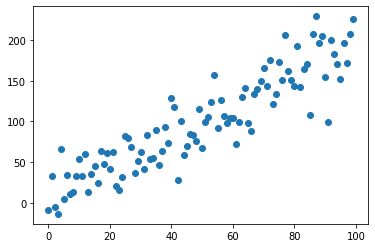

In [124]:
plt.scatter(B,A)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
model=LinearRegression(fit_intercept=True, normalize=False)

In [127]:
B = B.reshape(-1, 1)

In [128]:
model.fit(B,A)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [129]:
model.score(B,A)

0.8206617643421021

In [130]:
model.intercept_.round(2)

6.93

In [131]:
model.coef_.round(2)

array([1.87])

# 3.2 Linear regression - baseline model for regression

Our choice for baseline regression model is linear regression. 
First of all we start from scikit-learn DummyRegressor model. And then compare it results with more sofisticated model. 

In [132]:
from sklearn.dummy import DummyRegressor

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
dummymodel=DummyRegressor(strategy='mean')

In [135]:
train_X, test_X, train_y, test_y=train_test_split(X,Y1, test_size=0.33, random_state=0)

In [136]:
dummymodel.fit(train_X,train_y)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [137]:
dummymodel.score (test_X,test_y)

-0.0006160531839023431

Now we will train simple linear regression model for one month forward returns. After training we will examined model coefficients and evaluate it perfomance.   

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
model=LinearRegression(fit_intercept=True, normalize=False)

In [140]:
train_X, test_X, train_y, test_y=train_test_split(X,Y1, test_size=0.33, random_state=0)

In [141]:
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
model.intercept_.round(2)

0.02

In [143]:
model.coef_.round(2)

array([ 0.04, -0.01,  0.03, -0.  ,  0.  , -0.04, -0.02,  0.  , -0.  ,
       -0.  ,  0.01,  0.08,  0.01, -0.01, -0.02, -0.01, -0.01, -0.  ,
        0.  ,  0.01, -0.01,  0.  ,  0.  , -0.  , -0.01,  0.02,  0.06])

In [144]:
model.score(test_X, test_y, sample_weight=None)

0.5648413360585919

As we can see coefficient of determination R^2 of the prediction for our baseline regression model is 56.5%.

In [145]:
weights=np.array(model.coef_.round(2))

In [146]:
weights

array([ 0.04, -0.01,  0.03, -0.  ,  0.  , -0.04, -0.02,  0.  , -0.  ,
       -0.  ,  0.01,  0.08,  0.01, -0.01, -0.02, -0.01, -0.01, -0.  ,
        0.  ,  0.01, -0.01,  0.  ,  0.  , -0.  , -0.01,  0.02,  0.06])

In [147]:
features.columns

Index(['PX_TO_BOOK_RATIO', 'PE_RATIO', 'PX_TO_CASH_FLOW', '1d_rets', 'risk_1w',
       'risk_1m', 'risk_lottery', 'risk_skew', 'risk_vol', 'risk_c-range',
       'momentum_1y', 'momentum_3m', 'momentum_6m', 'momentum_3-6_ma',
       'quality_D_MV', 'quality_ROA', 'quality_Accr', 'quality_Sales_TA',
       'growth_asset', 'growth_sales', 'growth_EBITDA', 'growth_EPS',
       'growth_Gross_m', 'growth_ROA', 'Value_EBITDA_EV', 'Value_FCV_EV',
       'Value_GP_EV'],
      dtype='object')

In [148]:
features_importance=pd.DataFrame(weights, index=features.columns, columns=['feature importance'])

In [149]:
features_importance

feature importance
PX_TO_BOOK_RATIO                0.04
PE_RATIO                       -0.01
PX_TO_CASH_FLOW                 0.03
1d_rets                        -0.00
risk_1w                         0.00
risk_1m                        -0.04
risk_lottery                   -0.02
risk_skew                       0.00
risk_vol                       -0.00
risk_c-range                   -0.00
momentum_1y                     0.01
momentum_3m                     0.08
momentum_6m                     0.01
momentum_3-6_ma                -0.01
quality_D_MV                   -0.02
quality_ROA                    -0.01
quality_Accr                   -0.01
quality_Sales_TA               -0.00
growth_asset                    0.00
growth_sales                    0.01
growth_EBITDA                  -0.01
growth_EPS                      0.00
growth_Gross_m                  0.00
growth_ROA                     -0.00
Value_EBITDA_EV                -0.01
Value_FCV_EV                    0.02
Value_GP_EV                     0.06

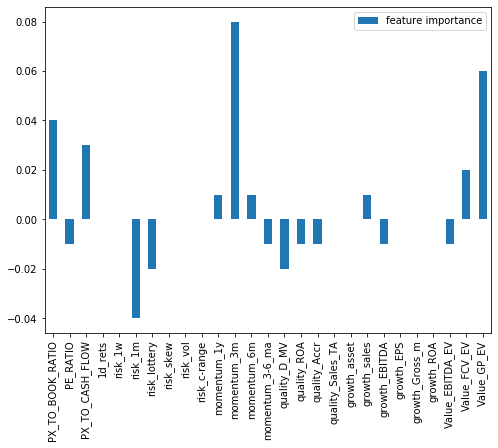

In [150]:
features_importance.plot(kind='bar', figsize=(8, 6))

In [151]:
features_importance.sort_values('feature importance', ascending=False)

feature importance
momentum_3m                     0.08
Value_GP_EV                     0.06
PX_TO_BOOK_RATIO                0.04
PX_TO_CASH_FLOW                 0.03
Value_FCV_EV                    0.02
momentum_1y                     0.01
momentum_6m                     0.01
growth_sales                    0.01
risk_vol                       -0.00
risk_c-range                   -0.00
risk_skew                       0.00
growth_ROA                     -0.00
growth_Gross_m                  0.00
risk_1w                         0.00
growth_EPS                      0.00
quality_Sales_TA               -0.00
growth_asset                    0.00
1d_rets                        -0.00
growth_EBITDA                  -0.01
Value_EBITDA_EV                -0.01
quality_ROA                    -0.01
quality_Accr                   -0.01
PE_RATIO                       -0.01
momentum_3-6_ma                -0.01
quality_D_MV                   -0.02
risk_lottery                   -0.02
risk_1m                        -0.04

Below we plot observed versus predicted values for the test set and residuals.

In [152]:
pred_test=model.predict(test_X)

Text(0, 0.5, 'Predicted')

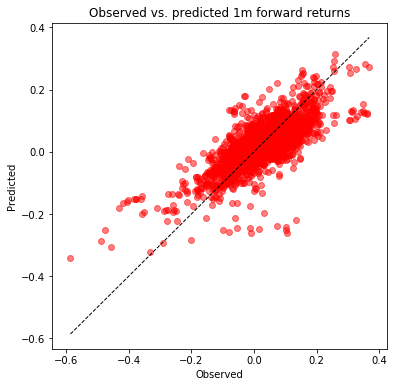

In [153]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(test_y,pred_test,color='red', alpha=0.5)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=1)
plt.title('Observed vs. predicted 1m forward returns')
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [154]:
residuals=test_y-pred_test

Text(0, 0.5, 'Residuals')

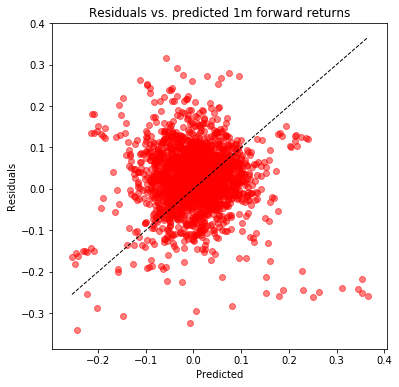

In [155]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(residuals,pred_test,color='red', alpha=0.5)
ax.plot([residuals.min(), residuals.max()], [residuals.min(), residuals.max()], 'k--', lw=1)
plt.title('Residuals vs. predicted 1m forward returns')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

### 3.2.1 Ridge regression

Now we can try to optimize our linear regression model with Ridge regression (Hoerl, 1970) which add a penalty (λ) on the sum of the squared regression parameters.
Effect of this penalty is that parameter estimates are only allowed to become large if there is a proportional reduction in squared errors. Ridge regression shrinks the estimates towards 0 as the λ becomes large.

In [156]:
from sklearn.linear_model import Ridge

In [157]:
model=Ridge(alpha=700.0)

In [158]:
model.fit(train_X,train_y)

Ridge(alpha=700.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [159]:
model.score(test_X, test_y, sample_weight=None)

0.5116673341827569

In [160]:
model.coef_.round(2)

array([ 0.01,  0.01,  0.01, -0.  , -0.  , -0.02, -0.02,  0.  ,  0.  ,
       -0.  ,  0.01,  0.06,  0.01, -0.  , -0.  , -0.  , -0.  ,  0.  ,
       -0.  ,  0.  , -0.  , -0.  ,  0.  , -0.  ,  0.  ,  0.01,  0.01])

In [161]:
weights=np.array(model.coef_.round(2))

In [162]:
features_importance=pd.DataFrame(weights, index=features.columns, columns=['feature importance'])

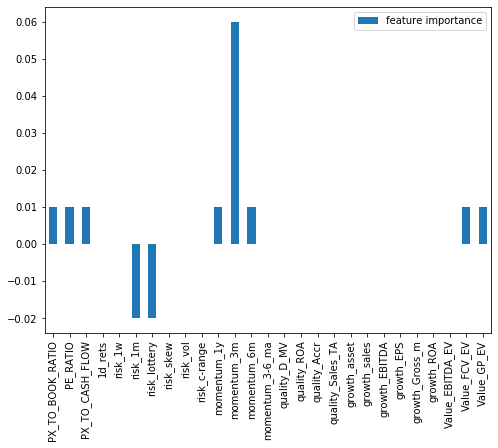

In [163]:
features_importance.plot(kind='bar', figsize=(8, 6))

Next we try to optimize penalty value. But as graph shows there is no additional value (in therms of error drops) for using Ridge regression.

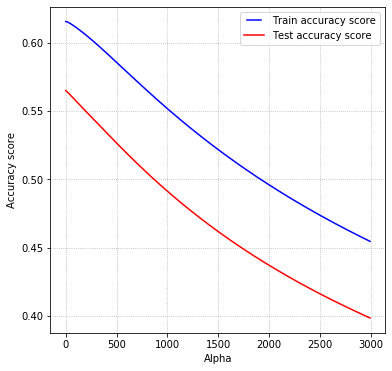

In [164]:
alphas = np.arange(0,3000,10)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(train_X, train_y)
    
    train_score=model.score(train_X,train_y)
    train_scores.append(train_score)
    
    test_score=model.score(test_X,test_y)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(alphas, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(alphas, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('Accuracy score')
plt.xlabel('Alpha')
plt.grid(visible=True, linestyle=':');
plt.show()

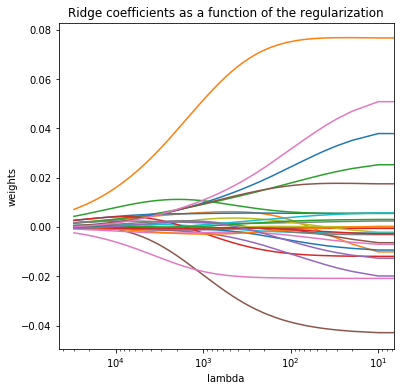

In [165]:
n_alphas = 200
alphas = np.arange(0,30000,10)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(train_X,train_y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 3.2.2 Lasso regression

Next we try to optimize our model with Lasso regression (Tibshirani, 1996). Model uses a similar penalty to ridge regression. But Lasso yields models that simulateneously use regularization to improve the model and to conduct feature selection. I.e. Lasso starts with an empty model and progressively increases the weights oif the variables. It can generate sparse models, i.e models that only use a small number of variables - such models are particulary easy interpret. It will be plus since our basic linear regression model contain too many coefficients with weight above zero.  

In [166]:
from sklearn.linear_model import Lasso

In [167]:
model=Lasso(alpha=0.003)

In [168]:
train_X, test_X, train_y, test_y=train_test_split(X,Y1, test_size=0.33, random_state=0)

In [169]:
model.fit(train_X,train_y)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [170]:
model.score(test_X, test_y, sample_weight=None)

0.522463441892225

In [171]:
model.coef_.round(2)

array([ 0.  ,  0.  ,  0.  , -0.  , -0.  , -0.03, -0.01,  0.  ,  0.  ,
        0.  ,  0.  ,  0.08,  0.  , -0.  , -0.  , -0.  , -0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ])

In [172]:
weights=np.array(model.coef_.round(2))

In [173]:
features_importance=pd.DataFrame(weights, index=features.columns, columns=['feature importance'])

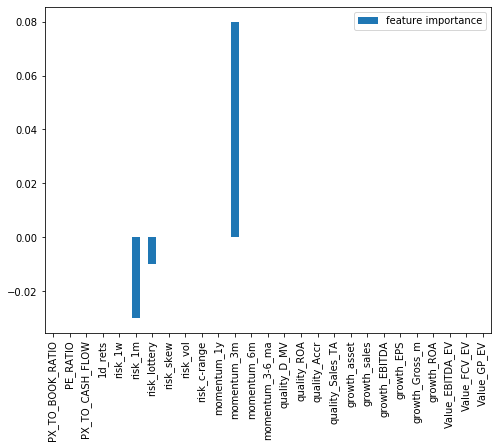

In [174]:
features_importance.plot(kind='bar', figsize=(8, 6))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.307183339524185, tolerance: 0.004470834937061007
  positive)


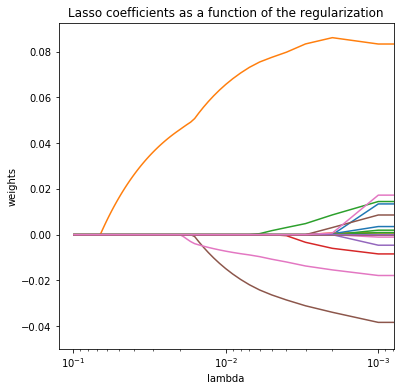

In [175]:
n_alphas = 200
alphas = np.arange(0,0.1,0.001)

coefs = []
for a in alphas:
    ridge = Lasso(alpha=a, fit_intercept=False)
    ridge.fit(train_X,train_y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(6,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

As we see on the graph below in our case there is no possible to create sparse, easy to interpret linear model without any serious loss of perfomance.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.183691146864701, tolerance: 0.004255877860049399
  positive)


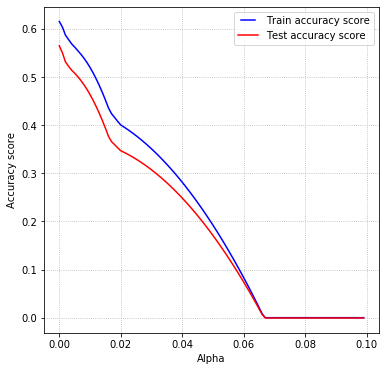

In [176]:
alphas = np.arange(0,0.1,0.001)

train_scores = []
test_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(train_X, train_y)
    
    train_score=model.score(train_X,train_y)
    train_scores.append(train_score)
    
    test_score=model.score(test_X,test_y)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(alphas, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(alphas, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Alpha')
plt.grid(linestyle=':');
plt.show()

# 3.3 Fitting a nonlinear relationship

In first part of the Report we mention that data expose some nonlinear (as long as linear) relationship between investment factors (predictors) and one-month forward returns (outcome). Polynomial regression allow us to model such nonlinear relationship. For our problem degree 2 of the polynomial allow as to build model with superior perfomance (coefficient of determination R^2 of the prediction for test set is shocking 85.6%). We also plot observed versus predicted values for the test set and residuals for our nonlinear model.   

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
polynomial=PolynomialFeatures(degree=2, include_bias=False)

In [179]:
X_polynomial=polynomial.fit_transform(X)

In [180]:
train_X, test_X, train_y, test_y=train_test_split(X_polynomial,Y1, test_size=0.33, random_state=0)

In [181]:
model=LinearRegression(fit_intercept=True, normalize=False)

In [182]:
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
model.score(train_X,train_y,sample_weight=None)

0.8834535059122978

In [184]:
model.score(test_X, test_y, sample_weight=None)

0.8560160154428766

In [185]:
pred_test=model.predict(test_X)

Text(0, 0.5, 'Predicted')

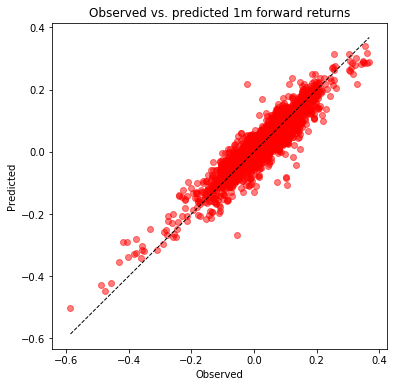

In [186]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(test_y,pred_test,color='red', alpha=0.5)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=1)
plt.title('Observed vs. predicted 1m forward returns')
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [187]:
residuals=test_y-pred_test

Text(0, 0.5, 'Residuals')

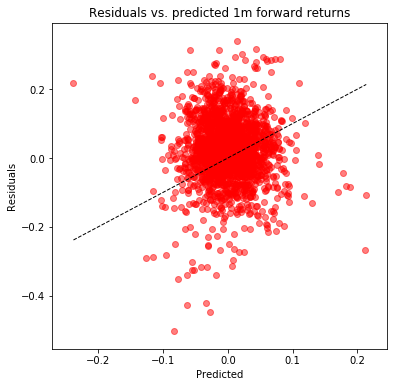

In [188]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(residuals,pred_test,color='red', alpha=0.5)
ax.plot([residuals.min(), residuals.max()], [residuals.min(), residuals.max()], 'k--', lw=1)
plt.title('Residuals vs. predicted 1m forward returns')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

# 4 Logistic regression

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
train_X, test_X, train_y, test_y=train_test_split(X,Y2, test_size=0.33, random_state=0)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [192]:
model=LogisticRegression(C=1, solver='saga', multi_class='multinomial', max_iter=300)

In [193]:
model.fit(train_X,train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
pred_train=model.predict(train_X)

In [195]:
accuracy_score(train_y,pred_train)

0.5950432546177227

In [196]:
pred_test=model.predict(test_X)

In [197]:
accuracy_score(test_y,pred_test)

0.5794969150450878

## 4.1 Confusion matrix

In [198]:
from sklearn.metrics import confusion_matrix

In [199]:
matrix=confusion_matrix(test_y,pred_test)

In [200]:
matrix

array([[ 31,   6,   4,   0,   1,   0,   0],
       [  4,  51,  66,   0,   5,   0,   0],
       [  2,  24, 318,   0, 250,  16,   0],
       [  0,   2,   3,   0,  11,   1,   0],
       [  1,   6, 153,   0, 669,  66,   0],
       [  3,   0,  12,   0, 210, 139,   6],
       [  0,   0,   0,   0,   8,  26,  13]])

Text(0.5, 1, 'Confusion matrix')

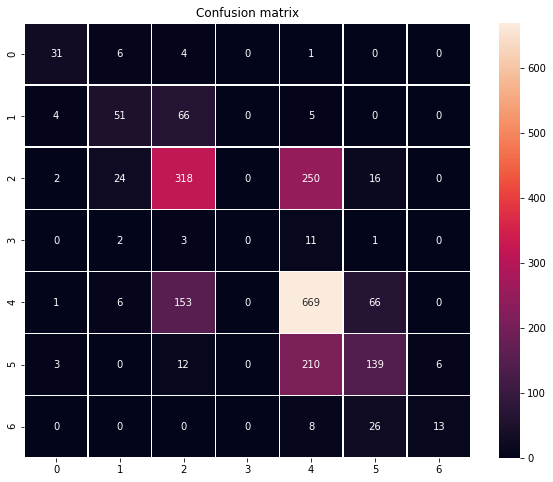

In [201]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix,  annot=True, fmt="d",linewidths=.5 )
plt.title('Confusion matrix')

## 4.2 ROC-curve and AUCROC

Creating binary classes

In [202]:
from sklearn.preprocessing import Binarizer

In [203]:
binarizer = Binarizer(0)

In [204]:
forward_rets = np.array(data['1m_forward_rets'])

In [205]:
data['1m_bin_sig']=binarizer.fit_transform(forward_rets.reshape(-1, 1))

In [206]:
Y3=data['1m_bin_sig'].truncate(before='2002-01-01')

In [207]:
Y3.shape

(6384,)

In [208]:
train_X, test_X, train_y, test_y=train_test_split(X,Y3, test_size=0.33, random_state=0)

Fit the model

In [209]:
model=LogisticRegression(C=1, solver='saga', multi_class='ovr', max_iter=300)

In [210]:
model.fit(train_X,train_y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
pred_train=model.predict(train_X)

In [212]:
accuracy_score(train_y,pred_train)

0.7937806873977087

In [213]:
pred_test=model.predict(test_X)

In [214]:
accuracy_score(test_y,pred_test)

0.791172282866635

plot ROC-curve

In [215]:
from sklearn.metrics import roc_curve, roc_auc_score

In [216]:
target_probabilities=model.predict_proba(test_X)[:,1]

In [217]:
false_positive_rate,true_positive_rate,threshold=roc_curve(test_y,target_probabilities)

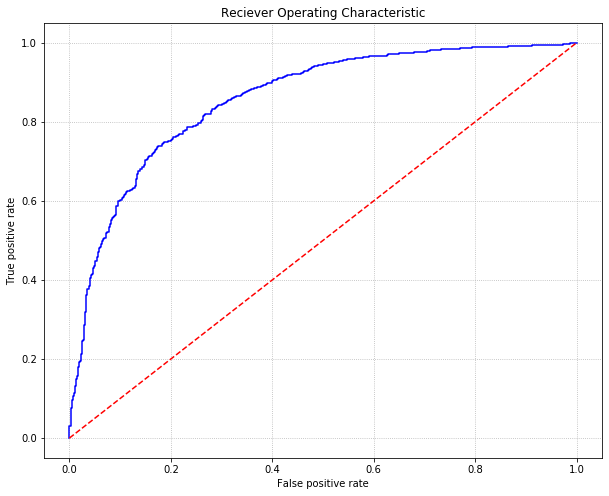

In [218]:
plt.figure(figsize=(10,8))
plt.title('Reciever Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.plot([0,1], 'r', ls='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(linestyle=':');

Calculate AUCROC

In [219]:
roc_auc_score(test_y, target_probabilities)

0.8566988179122867

# 5. Decision Trees

Now after we established baseline models for regression and classification we try to attack problem of prediction one-month forward returns with desicision tree models.

## 5.1 Decision tree classifier

We will start with Decision tree classifier and after fitting of the model compare it perfomance with our baseline model for classification - logistic regression. 

In [220]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
model=DecisionTreeClassifier(max_depth=10)

In [222]:
train_X, test_X, train_y, test_y=train_test_split(X,Y2, test_size=0.33, random_state=0)

In [223]:
model.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [224]:
pred_train=model.predict(train_X)

accuracy_score(train_y,pred_train)

0.8080430208089783

In [225]:
pred_test=model.predict(test_X)

accuracy_score(test_y,pred_test)

0.6805885144755577

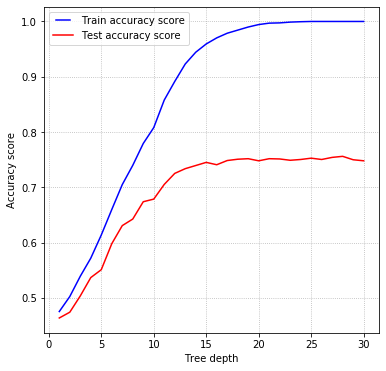

In [226]:
max_depths = np.arange(1,31)

train_scores = []
test_scores = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(train_X, train_y)
    
    pred_train = model.predict(train_X)
    train_score=accuracy_score(train_y,pred_train)
    train_scores.append(train_score)
    
    pred_test = model.predict(test_X)
    test_score=accuracy_score(test_y,pred_test)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(max_depths, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(max_depths, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.grid(visible=True, linestyle=':');
plt.show()

Graph above shows that after max_dept=15 there is no additional perfomance on the test set and model is highly overfitted (see accuracy score equal to 1 for training set after max_depth=20). With max_dept parameter equal to 5-6 model compares in therms of perfomance with logistic regression.

In [227]:
model=DecisionTreeClassifier(max_depth=3)

In [228]:
model.fit(train_X,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [229]:
pred_train=model.predict(train_X)

accuracy_score(train_y,pred_train)

0.5391629646948796

In [230]:
pred_test=model.predict(test_X)

accuracy_score(test_y,pred_test)

0.5035595633602278

We can explore the tree structure of this "simple" model with graphviz:

In [231]:
from sklearn import tree

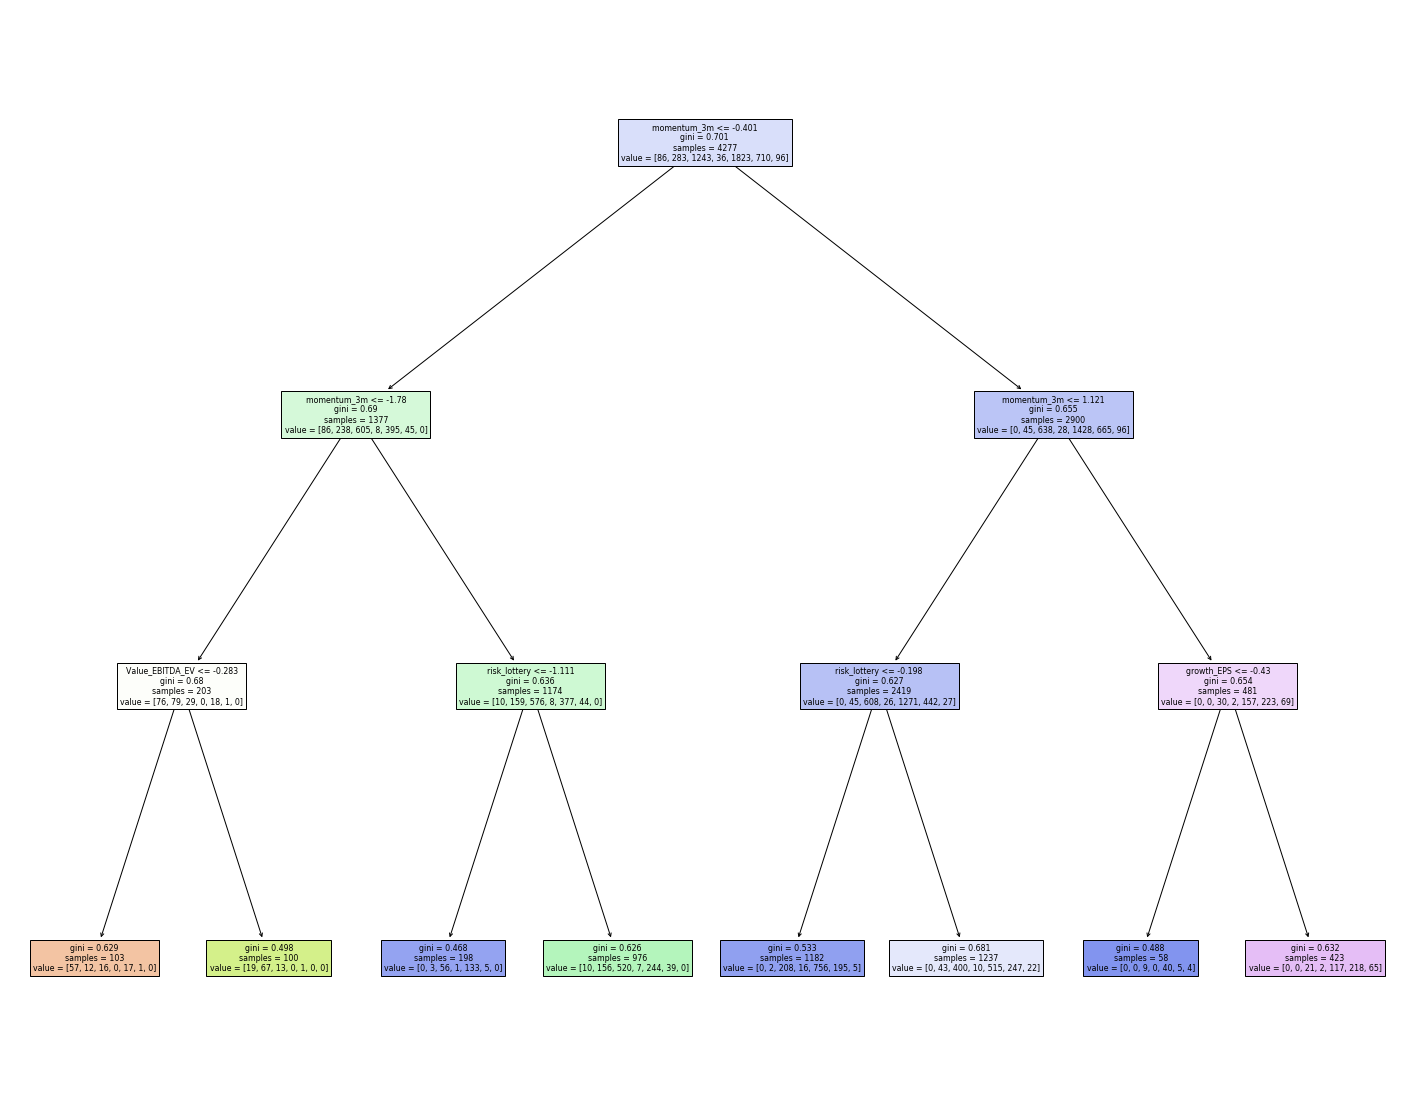

In [232]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=features.columns,filled=True)

## 5.2 Decision tree regressor

After DTC calibration we will train Decision tree regressor and compare it perfomance with our baseline model for regression problem - linear regression. As in example above we start with max_depth parameter=10 and after that do some hyperparameter tuning.

In [233]:
from sklearn.tree import DecisionTreeRegressor

In [234]:
model=DecisionTreeRegressor(max_depth=10)

In [235]:
train_X, test_X, train_y, test_y=train_test_split(X,Y1, test_size=0.33, random_state=0)

In [236]:
model.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [237]:
model.score(train_X,train_y)

0.8932365406223167

In [238]:
model.score(test_X,test_y)

0.7734532603289592

We must noted that Decision Tree Regressor (DTR) with max_depth parameter equal to 10 have a greater perfomance than our baseline liner regression model (accuracy ratio 77.6% vs 56.5%).

Let's tune max_depth hyperparameter and see how match an additional perfomance we can "squeeze" from DTR.

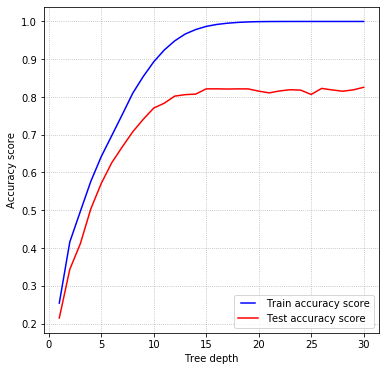

In [239]:
max_depths = np.arange(1,31)

train_scores = []
test_scores = []

for max_depth in max_depths:
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(train_X, train_y)
    
    train_score=model.score(train_X,train_y)
    train_scores.append(train_score)
    
    test_score=model.score(test_X,test_y)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(max_depths, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(max_depths, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.grid(visible=True, linestyle=':');
plt.show()

As in previous result plot show that after max_dept equal to 12-15 there is no additional perfomance on the test set. With max_dept parameter equal to 5 model perfomace compares with baseline linear regression.

Optimal perfomance has model with max_depth=12 - coffecient of determination is equal to astonishing 80%. It greater then such metric for linear regression up by + 23.5%. But as we see our nonlinear regression model still outperform  DTR after hyperparameter tuning (85.6% vs 80%). 

In [240]:
model=DecisionTreeRegressor(max_depth=3)

In [241]:
model.fit(train_X,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [242]:
model.score(train_X,train_y)

0.49648669242351257

In [243]:
model.score(test_X,test_y)

0.41097621081117464

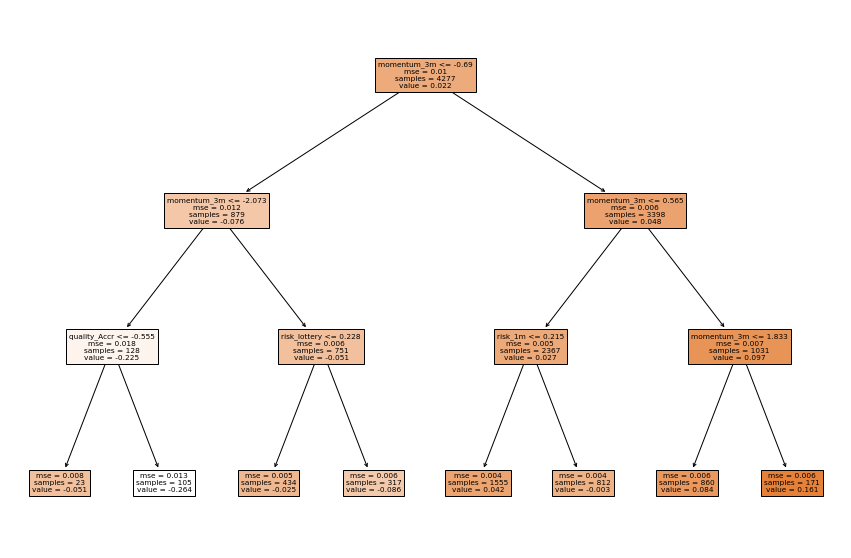

In [244]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model,feature_names=features.columns,filled=True)

# 5.3 Random forest

## 5.3.1 Random forest classifier

Random forest is an ensemble method for decision trees. I.e. Random forest is a complicated model which uses decision trees as building blocks. Each tree in the ensemble is built from the training set bootstrap sample. Each model in the ensemble is then used to generate a prediction for a new sample and these predictions are averaged to give the forest's prediction. 

Random forest pose some problems. First, since forest contains hundreds or thousands of trees it is cumbersome to store and time consuming to fit and use. Second, big problem is interpretability. It is difficult to grasp what hundreds of decision trees "saying".

We will illustrate implementation of Random Forest Classifier (RFC) and next Random Forest Regressor. We will use results from last point and choose as a base estimator decision tree with max_depth=10. As a starting point we also choose n_estimators (decision trees) equal to 10 and after training of the ensemble model we try to tune this parameter.

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
model=RandomForestClassifier(max_depth=10, n_estimators=10)

In [247]:
train_X, test_X, train_y, test_y=train_test_split(X,Y2, test_size=0.33, random_state=0)

In [248]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [249]:
pred_train=model.predict(train_X)

accuracy_score(train_y,pred_train)

0.8861351414542904

In [250]:
pred_test=model.predict(test_X)

accuracy_score(test_y,pred_test)

0.770764119601329

Our basic Random Forest Classfier is comparative to hypertuned Decision Tree Classifier with max_depth=15 (76.3% vs 73.8%).

Let's see how number of estimators (trees in ensemble) ("n_estimator" parameter) and depth of threes ("max_depth") impacts on Random Forest perfomance.

First, fix "n_estimators" equal to 10 and change "max_dept" value

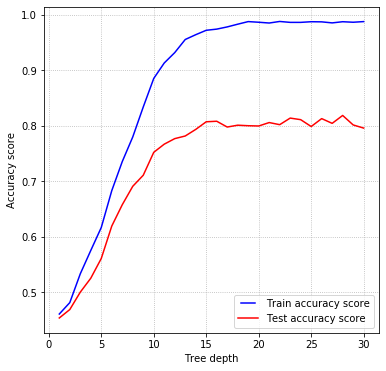

In [251]:
max_depths = np.arange(1,31)

train_scores = []
test_scores = []

for max_depth in max_depths:
    model = RandomForestClassifier(max_depth=max_depth,n_estimators=10)
    model.fit(train_X, train_y)
    
    pred_train = model.predict(train_X)
    train_score=accuracy_score(train_y,pred_train)
    train_scores.append(train_score)
    
    pred_test = model.predict(test_X)
    test_score=accuracy_score(test_y,pred_test)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(max_depths, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(max_depths, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.grid(visible=True, linestyle=':');
plt.show()

As in example above RFC has maximum perfomance with max_depth equal to 15.

In [252]:
model=RandomForestClassifier(max_depth=15, n_estimators=10)

In [253]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [254]:
pred_train=model.predict(train_X)

accuracy_score(train_y,pred_train)

0.9742810381108253

In [255]:
pred_test=model.predict(test_X)

accuracy_score(test_y,pred_test)

0.7982914095870907

Now we fix "max_depth"=15 and see how number of estimators impacts ensemble perfomance. As a little trick we will use parallelization: with parameter "n_jobs" = -1 all cores available on the machine are used.

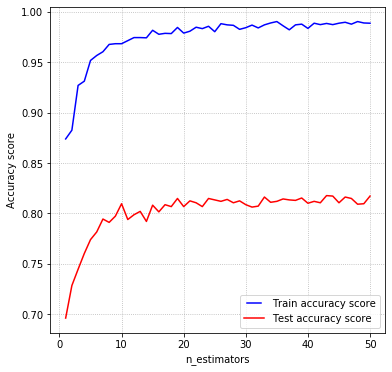

In [256]:
n_estimators = np.arange(1,51)

train_scores = []
test_scores = []

for n_estimator in n_estimators:
    model = RandomForestClassifier(max_depth=15,n_estimators=n_estimator,n_jobs=-1)
    model.fit(train_X, train_y)
    
    pred_train = model.predict(train_X)
    train_score=accuracy_score(train_y,pred_train)
    train_scores.append(train_score)
    
    pred_test = model.predict(test_X)
    test_score=accuracy_score(test_y,pred_test)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(n_estimators, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(n_estimators, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.grid(visible=True, linestyle=':');
plt.show()

Graph shows that after n_estimator equals to 30 there is almost no additional perfomance for our model. So our best ensemble is Random Forest Classifier with max_depth=15 and n_estimators=30.

In [257]:
model=RandomForestClassifier(max_depth=15, n_estimators=30,n_jobs=-1)

In [258]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [259]:
pred_train=model.predict(train_X)

accuracy_score(train_y,pred_train)

0.9897124152443302

In [260]:
pred_test=model.predict(test_X)

accuracy_score(test_y,pred_test)

0.8106312292358804

Final perfomance of hypertuned Random Forest Classifier beats perfomance of Decision Tree Classifier after hyperparameters tuning up by + 6% (80.8% vs 73.8%).

## 5.3.2 Random forest regressor

Now we can do similar work for Random Forest Regressor (RFR). We estimate model, hypertune parameters and compare results with baseline linear regression model and our Decision Trees model.

In [261]:
from sklearn.ensemble import RandomForestRegressor

In [262]:
model=RandomForestRegressor(max_depth=10,n_estimators=10)

In [263]:
train_X, test_X, train_y, test_y=train_test_split(X,Y1, test_size=0.33, random_state=0)

In [264]:
model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [265]:
model.score(train_X,train_y)

0.9152991425688535

In [266]:
model.score(test_X,test_y)

0.8352274304523699

Our basic Random Forest Regressor is comparative to hypertuned Decision Tree Regressor with max_depth=12 (83.4% vs 80.0%) and outperform our linear regression model (up to + 26.9%). But still relatively underperform nonlinear regression which has accuracy ratio 85.6%.

Now make hyperparameters tuning. First, fix number of estimators and change depth.

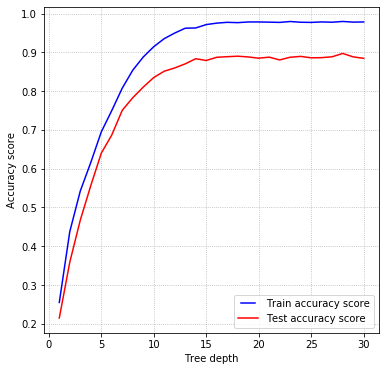

In [267]:
max_depths = np.arange(1,31)

train_scores = []
test_scores = []

for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=max_depth,n_estimators=10, n_jobs=-1)
    model.fit(train_X, train_y)
    
    train_score=model.score(train_X,train_y)
    train_scores.append(train_score)
    
    test_score=model.score(test_X,test_y)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(max_depths, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(max_depths, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.grid(visible=True, linestyle=':');
plt.show()

In [268]:
model=RandomForestRegressor(max_depth=15,n_estimators=10)

In [269]:
model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [270]:
model.score(train_X,train_y)

0.9723443953477267

In [271]:
model.score(test_X,test_y)

0.886583179533621

With 10 estimators and max_depth=15 models beats all previous results (score=88.6%) including nonlinear regression model. Now we fix "max_depth"=15 and see how number of estimators impacts ensemble perfomance.

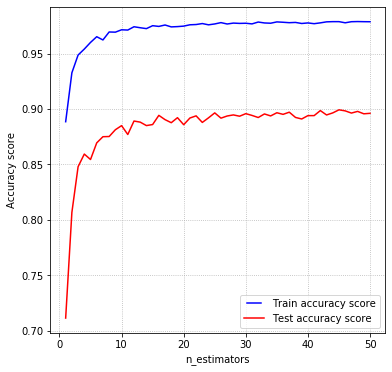

In [272]:
n_estimators = np.arange(1,51)

train_scores = []
test_scores = []

for n_estimator in n_estimators:
    model = RandomForestRegressor(max_depth=15,n_estimators=n_estimator,n_jobs=-1)
    model.fit(train_X, train_y)
    
    train_score=model.score(train_X,train_y)
    train_scores.append(train_score)
    
    test_score=model.score(test_X,test_y)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(n_estimators, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(n_estimators, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.grid(visible=True, linestyle=':');
plt.show()

In [273]:
model=RandomForestRegressor(max_depth=15,n_estimators=40)

In [274]:
model.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [275]:
model.score(train_X,train_y)

0.9779717214181569

In [276]:
model.score(test_X,test_y)

0.8948458345684919

With additional estimators we have final perfomance of 89.5%. After hypertuning Random Forest Regressor beats all previous regression models.

Below we plot graphs of observed vs predicted 1-m forward returns and residuals for model.

In [277]:
pred_test=model.predict(test_X)

Text(0, 0.5, 'Predicted')

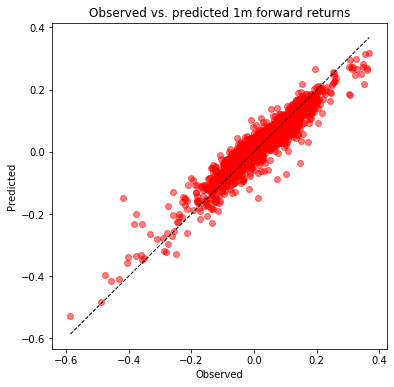

In [278]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(test_y,pred_test,color='red', alpha=0.5)
ax.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=1)
plt.title('Observed vs. predicted 1m forward returns')
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [279]:
residuals=test_y-pred_test

Text(0, 0.5, 'Residuals')

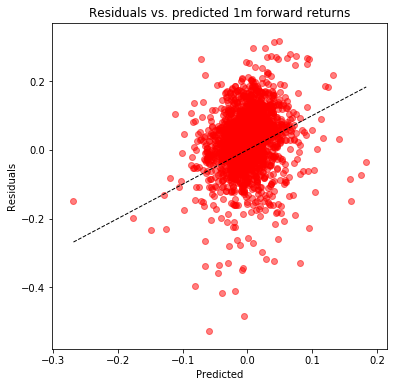

In [280]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.scatter(residuals,pred_test,color='red', alpha=0.5)
ax.plot([residuals.min(), residuals.max()], [residuals.min(), residuals.max()], 'k--', lw=1)
plt.title('Residuals vs. predicted 1m forward returns')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')

# 5.4 Boosting with AdaBoost

Now we implement another ensemble algorithm like Random Forest. Boosting with AdaBoost combines simple models (base learners or weak learners) like Decision Tres. But these simple models are not trained on random subsets of the data. Boosting puts more weight on observations not well accounted by "weak" previous models. Usually this results much smaller ensembles. We illustrate using of boosting techniques on our Decision Tree Regressor.

### 5.4.1 AdaBoost for Decision Tree Regressor

If not specified AdaBoostRegressor uses DecisionTreeRegressor with max_depth=3 as a base estimator and 50 estimators. Let's see what perfomance we can achive with such simple and highly interpretable model using boosting.

In [281]:
from sklearn.ensemble import AdaBoostRegressor

In [282]:
model=AdaBoostRegressor(random_state=0)

In [283]:
train_X, test_X, train_y, test_y=train_test_split(X,Y1, test_size=0.33, random_state=0)

In [284]:
model.fit(train_X,train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=0)

In [285]:
model.score(train_X,train_y)

0.6189587341077469

In [286]:
model.score(test_X,test_y)

0.5854290913987582

As we see model with max_depth equal only to 3 have not so bad perfomance of 58.5% which is better than our baseline linear regression (56.5%).

Now we show how number of estimators effects on perfomance on such simple models.

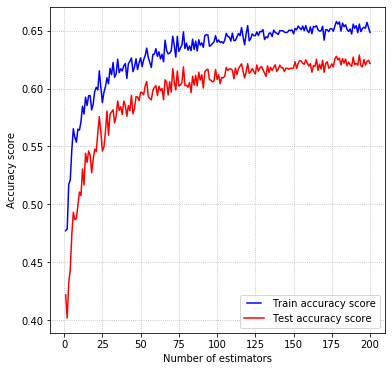

In [287]:
n_estimators = np.arange(1,201)

train_scores = []
test_scores = []

for n_estimator in n_estimators:
    model = AdaBoostRegressor(n_estimators=n_estimator)
    model.fit(train_X, train_y)
    
    train_score=model.score(train_X,train_y)
    train_scores.append(train_score)
    
    test_score=model.score(test_X,test_y)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(n_estimators, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(n_estimators, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Number of estimators')
plt.grid(visible=True, linestyle=':');
plt.show()

In [288]:
model=AdaBoostRegressor(n_estimators=200)

In [289]:
model.fit(train_X,train_y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=200, random_state=None)

In [290]:
model.score(train_X,train_y)

0.6580958511230586

In [291]:
model.score(test_X,test_y)

0.6282003382638361

With 200 estimators and max_depth=3 our Decision Tree Regressor have perfomance of 62.4%.

With max_depth=15 and n_estimators=40 AdaBoost beats our Random Forest Regressor with similar parameters (91.4% vs 89.5%).

In [292]:
model=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=15),n_estimators=40)

In [293]:
model.fit(train_X,train_y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=15,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

In [294]:
model.score(train_X,train_y)

0.9978126378379409

In [295]:
model.score(test_X,test_y)

0.9186494420899834

# 6. Deep Neural Network with scikit-learn

Now we will fit most complex of the models - deep neural network.

## 6.1 Deep Neural Network for classification

First apply scikit learn deep network classifier. We will use multi-layer perceptron model.

In [296]:
from sklearn.neural_network import MLPClassifier

In [333]:
model=MLPClassifier(solver='sgd',alpha=1e-5, hidden_layer_sizes=5*[100],random_state=10, max_iter=1000)

In [334]:
train_X, test_X, train_y, test_y=train_test_split(X,Y2, test_size=0.33, random_state=0)

In [335]:
model.fit(train_X,train_y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100, 100, 100, 100],
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=1000, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=10,
              shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [336]:
pred_train=model.predict(train_X)

accuracy_score(train_y,pred_train)

0.9300911854103343

In [337]:
pred_test=model.predict(test_X)

accuracy_score(test_y,pred_test)

0.7925961082107261

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


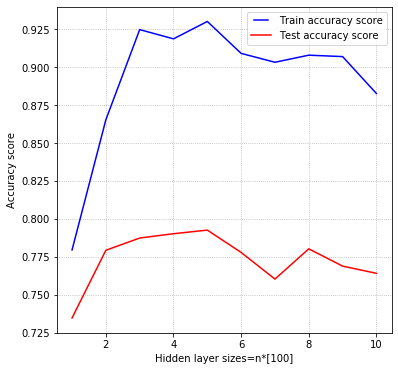

In [338]:
l_sizes = np.arange(1,11)

train_scores = []
test_scores = []

for l_size in l_sizes:
    model = MLPClassifier(solver='sgd',alpha=1e-5, hidden_layer_sizes=l_size*[100],random_state=10, max_iter=1000)
    model.fit(train_X, train_y)
    
    pred_train = model.predict(train_X)
    train_score=accuracy_score(train_y,pred_train)
    train_scores.append(train_score)
    
    pred_test = model.predict(test_X)
    test_score=accuracy_score(test_y,pred_test)
    test_scores.append(test_score)
    
from matplotlib.legend_handler import HandlerLine2D
plt.figure(figsize=(6,6))
line1, = plt.plot(l_sizes, train_scores, 'b', label='Train accuracy score')
line2, = plt.plot(l_sizes, test_scores, 'r', label='Test accuracy score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Hidden layer sizes=n*[100]')
plt.grid(visible=True, linestyle=':');
plt.show()

Optimal layer size is 5*[100]. Now let's do some additional hypertuning.

Now let's tune additional hyperparameters of our neural network with Grid Search.

In [339]:
from sklearn.model_selection import GridSearchCV

In [340]:
activation=['identity', 'logistic', 'tanh', 'relu']

In [341]:
learning_rate=['constant', 'invscaling', 'adaptive']

In [342]:
hyperparameters=dict(learning_rate=learning_rate,activation=activation)

In [343]:
model=MLPClassifier(solver='sgd',alpha=1e-5, hidden_layer_sizes=5*[100],random_state=10, max_iter=1000)

In [344]:
gridsearch=GridSearchCV(model,hyperparameters,cv=2,verbose=0)

In [345]:
best_model=gridsearch.fit(train_X,train_y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, 

In [346]:
best_model

GridSearchCV(cv=2, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08,
                                     hidden_layer_sizes=[100, 100, 100, 100,
                                                         100],
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=10, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
              

In [347]:
pred_train=best_model.predict(train_X)

In [348]:
accuracy_score(train_y,pred_train)

0.9487958849660977

In [349]:
pred_test=best_model.predict(test_X)

In [350]:
accuracy_score(test_y,pred_test)

0.798766018035121